---
After meeting on Tuesday 28 April 2020:
What to do next?
* Fix the workflow, dont need to use CAR on test data
* Overlap for 50 and 10 percent too
* Grab 2.75 of the data after the cue
* PSD of C3 and C4 check the ERD

Etc:
* The code is too long check if you can import function
___

In [ ]:
%autosave 0

---
This file will use the train_test_split function provided in sklearn_metrics  
Thus splitting training and testing data will not be performed manually  
___
In addition to that the overlapping data will be performed before CSP calculation
The amount of overlapping performed on the data are:
1. 10%
2. 50%
3. 90%


# BCI Competition IV Dataset 2a (.npz data)
<p>
Information Given in Documentation

From the documentation it is known that:
<li>25 electrodes are used, first 22 are EEG, last 3 are EOG
<li>Sampling frequency (fs) is 250Hz
<li>9 subjects
<li>9 run (run 1-3 are for eye movement, run 4-9 is MI)

<b> -- Time Duration-- </b>

1 trials                          = 7-8s
1 run              = 48 trials    = 336-384s
1 session = 6 runs = 288 trials   = 2016-2304s

About the recording of eye movement
<li>run 1 => 2 mins with eyes open
<li>run 2 => 1 min with eyes closed
<li>run 3 => 1 min with eye movements

## Visualizing/ Preparing the Data 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io
import pandas as pd
from pandas import DataFrame as dframe

In [3]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [4]:
# np.set_printoptions(precision=30, suppress=True)

In [5]:
# number of subject
ns = 9

In [6]:
# Load the training data of subject 01
data01 = np.load('./datasets/A01T.npz')
data02 = np.load('./datasets/A02T.npz')
data03 = np.load('./datasets/A03T.npz')
data04 = np.load('./datasets/A04T.npz')
data05 = np.load('./datasets/A05T.npz')
data06 = np.load('./datasets/A06T.npz')
data07 = np.load('./datasets/A07T.npz')
data08 = np.load('./datasets/A08T.npz')
data09 = np.load('./datasets/A09T.npz')

In [7]:
type(data01)

numpy.lib.npyio.NpzFile

In [8]:
# Keys available inside data are
data01.files

['s', 'etyp', 'epos', 'edur', 'artifacts']

In [11]:
# Create table with three columns of 'etyp', 'epos', 'edur' respectively
# Name this table property
prop01 = np.c_[data01['etyp'], data01['epos'], data01['edur']]
prop02 = np.c_[data02['etyp'], data02['epos'], data02['edur']]
prop03 = np.c_[data03['etyp'], data03['epos'], data03['edur']]
prop04 = np.c_[data04['etyp'], data04['epos'], data04['edur']]
prop05 = np.c_[data05['etyp'], data05['epos'], data05['edur']]
prop06 = np.c_[data06['etyp'], data06['epos'], data06['edur']]
prop07 = np.c_[data07['etyp'], data07['epos'], data07['edur']]
prop08 = np.c_[data08['etyp'], data08['epos'], data08['edur']]
prop09 = np.c_[data09['etyp'], data09['epos'], data09['edur']]

In [12]:
prop01.shape

(603, 3)

In [13]:
pd.__version__

'0.25.1'

In [14]:
pd.options.display.max_rows = None

In [261]:
pd.set_option('display.max_rows', None)

In [262]:
dframe(prop04, columns=['etype', 'epos','edur'])

,etype,epos,edur
0,32766,1,0
1,1072,1,19904
2,32766,19906,0
3,768,20256,1875
4,772,20756,313
5,768,22259,1875
6,772,22759,313
7,768,24177,1875
8,769,24677,313
9,768,26129,1875


In [17]:
# Store all 's' data into sample_data
sample_data01 = dframe(data01['s'])
sample_data02 = dframe(data02['s'])
sample_data03 = dframe(data03['s'])
sample_data04 = dframe(data04['s'])
sample_data05 = dframe(data05['s'])
sample_data06 = dframe(data06['s'])
sample_data07 = dframe(data07['s'])
sample_data08 = dframe(data08['s'])
sample_data09 = dframe(data09['s'])

In [18]:
# Remove the last 3 electrodes (EOG electrodes)
sample_data01 = sample_data01.iloc[:, 0:22]
sample_data02 = sample_data02.iloc[:, 0:22]
sample_data03 = sample_data03.iloc[:, 0:22]
sample_data04 = sample_data04.iloc[:, 0:22]
sample_data05 = sample_data05.iloc[:, 0:22]
sample_data06 = sample_data06.iloc[:, 0:22]
sample_data07 = sample_data07.iloc[:, 0:22]
sample_data08 = sample_data08.iloc[:, 0:22]
sample_data09 = sample_data09.iloc[:, 0:22]

In [19]:
sample_data01.shape

(672528, 22)

In [20]:
# Showing inital value of sample_data
sample_data01.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-21.142578,-23.681641,-21.484375,-25.146484,-25.732422,-27.929688,-14.550781,-22.509766,-25.439453,-28.710938,...,-26.074219,-23.144531,-24.804688,-30.615234,-29.638672,-26.660156,-20.947266,-25.439453,-24.902344,-19.677734
1,-21.923828,-23.925781,-24.316406,-25.341797,-26.074219,-25.244141,-16.064453,-22.753906,-28.320312,-29.248047,...,-23.632812,-23.486328,-26.708984,-31.054688,-30.712891,-26.123047,-22.998047,-27.099609,-26.367188,-23.339844
2,-15.625000,-19.726562,-18.847656,-21.582031,-20.751953,-21.728516,-12.451172,-20.410156,-23.730469,-25.927734,...,-16.845703,-22.070312,-23.828125,-28.759766,-28.417969,-24.462891,-21.386719,-25.097656,-24.267578,-21.484375
3,-16.699219,-13.720703,-20.361328,-20.849609,-24.169922,-22.021484,-10.986328,-16.357422,-25.585938,-24.951172,...,-22.998047,-17.675781,-24.951172,-27.783203,-28.857422,-25.537109,-19.335938,-24.316406,-24.511719,-17.919922
4,-19.335938,-17.626953,-20.410156,-26.464844,-27.392578,-29.882812,-9.277344,-18.359375,-24.609375,-30.517578,...,-32.617188,-18.701172,-24.609375,-31.884766,-33.740234,-32.666016,-18.554688,-26.611328,-28.466797,-18.408203


In [21]:
# Sample data has shape of 672528 samples
# This samples belong to total of all 9 runs with 48 trials of 4 different classes
for i in range(1, 10):
    var = 'sample_data0' + str(i)
    print(var, globals()[var].shape)

sample_data01 (672528, 22)
sample_data02 (677169, 22)
sample_data03 (660530, 22)
sample_data04 (600915, 22)
sample_data05 (686120, 22)
sample_data06 (678980, 22)
sample_data07 (681071, 22)
sample_data08 (675270, 22)
sample_data09 (673328, 22)


According to the documentation we are interested to grab event type of 769, left class and 770, right class

With each type has duration of 313 samples

In [22]:
# Fetch indexes whose 1st column are 769 (left) and 770 (right)
# Subject 1 - 9
for i in range(1, 10):
    var_l = 'idx0' + str(i) + '_left'
    var_r = 'idx0' + str(i) + '_right'
    prop = globals()['prop0' + str(i)]
    globals()[var_l] = np.argwhere(prop[:, 0]==769).flatten()
    globals()[var_r] = np.argwhere(prop[:, 0]==770).flatten()


# # Subject 01
# idx_left01 = np.argwhere(prop01[:, 0]==769).flatten()
# idx_right01 = np.argwhere(prop01[:, 0]==770).flatten()

In [23]:
idx09_left.shape, idx09_right.shape

((72,), (72,))

In [24]:
dframe(idx05_left).tail()

,0
67,585
68,587
69,589
70,591
71,611


In [25]:
# Fetch positions of corresponding event types
# Subject 01-09
for i in range(1, 10):
    pos_l = 'left0' + str(i) + '_pos'
    pos_r = 'right0' + str(i) + '_pos'
    prop = globals()['prop0' + str(i)]
    idx_l = globals()['idx0' + str(i) + '_left']
    idx_r = globals()['idx0' + str(i) + '_right']

    globals()[pos_l] = prop[idx_l, 1]
    globals()[pos_r] = prop[idx_r, 1]   


# # Subject01
# left_pos01 = prop01[idx_left01, 1]
# right_pos01 = prop01[idx_right01, 1]

# # Subject02
# left_pos02 = prop02[idx_left02, 1]
# right_pos02 = prop02[idx_right02, 1]

In [26]:
left05_pos[40]

432268

In [27]:
# left_pos01.shape, right_pos01.shape

In [28]:
# # Now this array contains index on which an event begins
# left_pos05[40]

In [29]:
# Grab the duration of each event
# Subject 01-09
for i in range(1, 10):
    dur_l = 'dur0' + str(i) + '_left'
    dur_r = 'dur0' + str(i) + '_right'
    prop = globals()['prop0' + str(i)]
    idx_l = globals()['idx0' + str(i) + '_left']
    idx_r = globals()['idx0' + str(i) + '_right']
    
    globals()[dur_l] = prop[idx_l, 2]

# # Subject 01
# dur_left01 = prop01[idx_left01, 2]
# dur_right01 = prop01[idx_right01, 2]

# # Subject 02
# dur_left02 = prop02[idx_left02, 2]
# dur_right02 = prop02[idx_right02, 2]

In [30]:
dur01_left

array([313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313,
       313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313,
       313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313,
       313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313,
       313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313,
       313, 313, 313, 313, 313, 313, 313])

In [31]:
# left_dur03

In [32]:
# right_dur02

In [33]:
# Duration of both events lasted for 313 samples, we can defined dur as
dur = 313

## Fetch 313 samples of each event from sample_data, 72 trials each class

In [34]:
len(left01_pos)

72

In [35]:
# Fetch 313 samples of each event from sample_data
# Store them in E_left and E_right respectively, For convenience 'E' is used to imitate the variable used in paper
# Subject 01-09
for i in range(1, 10):
    E_l = 'E0' + str(i) + '_left'
    E_r = 'E0' + str(i) + '_right'
    pos_l = globals()['left0' + str(i) + '_pos']
    pos_r = globals()['right0' + str(i) + '_pos']
    
    sample = globals()['sample_data0' + str(i)]
    
    globals()[E_l] = np.zeros([pos_l.shape[0], dur, sample.shape[1]])
    globals()[E_r] = np.zeros([pos_r.shape[0], dur, sample.shape[1]])

# # Subject 01
# E01_left = np.zeros([left_pos01.shape[0], dur, sample_data01.shape[1]])
# E01_right = np.zeros([right_pos01.shape[0], dur, sample_data01.shape[1]])

# # Subject 02
# E02_left = np.zeros([left_pos02.shape[0], dur, sample_data02.shape[1]])
# E02_right = np.zeros([right_pos02.shape[0], dur, sample_data02.shape[1]])

In [36]:
E01_left.shape, E01_right.shape

((72, 313, 22), (72, 313, 22))

In [37]:
right09_pos

array([ 95172,  97090, 107128, 114858, 120741, 145148, 147152, 153224,
       167613, 173582, 177550, 183503, 203963, 207892, 215609, 227872,
       247988, 250059, 252166, 258392, 268336, 270417, 274385, 284511,
       286839, 294720, 300798, 306633, 310500, 316531, 324707, 334753,
       365171, 369230, 373339, 375245, 387595, 407335, 409279, 419476,
       423612, 431588, 447928, 450019, 452062, 458118, 470174, 472080,
       488390, 490501, 500303, 502198, 510201, 518377, 520447, 522527,
       526470, 528423, 550961, 572957, 593234, 595232, 599033, 607036,
       611110, 619362, 629323, 637399, 639506, 655676, 661725, 669792])

In [38]:
# Now we are ready to take 313 samples of left and right
# Subject 01-09
for i in range(1, 10):
    E_l = globals()['E0' + str(i) + '_left']
    E_r = globals()['E0' + str(i) + '_right']
    
    sample = globals()['sample_data0' + str(i)]

    pos_l = globals()['left0' + str(i) + '_pos']
    pos_r = globals()['right0' + str(i) + '_pos']
    
    for j in range(E_l.shape[0]):
        E_l[j]=sample.iloc[pos_l[j]:pos_l[j]+dur, :]
    for k in range(E_r.shape[0]):
        E_r[k]=sample.iloc[pos_r[k]:pos_r[k]+dur, :]
    

# # Subject 01
# for i in range(E01_left.shape[0]):
#     E01_left[i]=sample_data01.iloc[left_pos01[i]:left_pos01[i]+dur, :]
# for i in range(E01_right.shape[0]):
#     E01_right[i]=sample_data01.iloc[right_pos01[i]:right_pos01[i]+dur, :]
    
# # Subject 02
# for i in range(E02_left.shape[0]):
#     E02_left[i]=sample_data02.iloc[left_pos02[i]:left_pos02[i]+dur, :]
# for i in range(E02_right.shape[0]):
#     E02_right[i]=sample_data02.iloc[right_pos02[i]:right_pos02[i]+dur, :]

In [39]:
# Creating columns for sample data
Xcol = []
for i in range(1, 23):
    if i < 11:
        Xcol.append('EEG0'+str(i))
    else:
        Xcol.append('EEG'+str(i))

In [40]:
E01_left.shape

(72, 313, 22)

In [41]:
dframe(E09_left[70], columns=Xcol)

,EEG01,EEG02,EEG03,EEG04,EEG05,EEG06,EEG07,EEG08,EEG09,EEG010,...,EEG13,EEG14,EEG15,EEG16,EEG17,EEG18,EEG19,EEG20,EEG21,EEG22
0,-2.539062,6.640625,5.712891,7.080078,-1.123047,-5.029297,4.443359,3.613281,5.615234,10.791016,...,-1.562500,-0.732422,1.708984,8.251953,1.660156,-1.708984,-2.343750,2.685547,-0.732422,-3.710938
1,1.025391,4.589844,7.226562,5.029297,1.318359,-5.126953,7.177734,2.001953,6.835938,7.128906,...,-2.929688,-2.685547,2.587891,3.710938,0.585938,-2.490234,-0.537109,2.294922,-1.123047,-2.539062
2,3.076172,4.980469,9.472656,7.861328,4.785156,-1.318359,7.958984,6.250000,8.447266,8.691406,...,-2.197266,2.148438,5.859375,4.541016,2.050781,-1.367188,2.343750,3.222656,0.195312,-0.634766
3,6.152344,7.812500,11.181641,11.621094,7.177734,2.246094,13.720703,12.792969,12.158203,12.597656,...,0.390625,11.328125,9.912109,9.423828,4.345703,0.244141,4.589844,5.517578,2.392578,1.416016
4,4.345703,6.738281,10.009766,9.179688,6.591797,-2.392578,15.527344,13.476562,13.330078,11.523438,...,-0.244141,14.257812,11.962891,9.716797,1.708984,-2.783203,1.513672,3.857422,0.830078,-1.074219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,18.310547,23.193359,16.210938,11.816406,11.376953,13.085938,19.287109,24.169922,15.966797,12.158203,...,0.439453,22.900391,15.673828,11.279297,3.808594,-0.830078,13.476562,8.007812,0.488281,7.031250
309,13.476562,19.482422,15.234375,7.324219,11.035156,6.982422,19.042969,21.923828,18.994141,11.230469,...,0.488281,22.656250,18.945312,10.791016,2.636719,-3.906250,11.328125,6.103516,-2.050781,4.003906
310,13.769531,19.921875,15.478516,9.033203,11.279297,7.763672,19.482422,23.437500,19.873047,13.378906,...,1.318359,22.753906,19.580078,12.060547,5.078125,-1.367188,12.353516,8.496094,0.146484,4.785156
311,11.621094,19.628906,13.818359,10.449219,9.765625,9.912109,13.867188,21.582031,16.503906,14.550781,...,-1.660156,17.968750,14.648438,11.230469,5.126953,-0.732422,10.156250,7.958984,0.048828,3.662109


In [42]:
# First transform the dimension of each sheet of CAR array to N x T, i.e. electrodes x  samples
# Subject 01-09
'''
for i in range(1, 10):
    E_l = globals()['E0' + str(i) + '_left']
    E_r = globals()['E0' + str(i) + '_right']
    
    try this:
    E_l_var = ['E0' + str(i) + '_left']
    E_r_var = ['E0' + str(i) + '_left']

    
    if (E_l.shape[0] != 22 and E_r.shape[0] !=22 ):
        print('in')
        globals()[E_l_var] = np.transpose(E_l, (0, 2, 1))
        globals()[E_r_var] = np.transpose(E_r, (0, 2, 1))
'''

# Subject 01
if (E01_left.shape[1] != 22 and E01_right.shape[1] !=22 ):
    E01_left = np.transpose(E01_left, (0, 2, 1))
    E01_right = np.transpose(E01_right, (0, 2, 1))

# Subject 02
if (E02_left.shape[1] !=22 and E02_right.shape[1] !=22):
    E02_left = np.transpose(E02_left, (0, 2, 1))
    E02_right = np.transpose(E02_right, (0, 2, 1))

# Subject 03
if (E03_left.shape[1] !=22 and E03_right.shape[1] !=22):
    E03_left = np.transpose(E03_left, (0, 2, 1))
    E03_right = np.transpose(E03_right, (0, 2, 1)) 
    
# Subject 04
if (E04_left.shape[1] != 22 and E04_right.shape[1] !=22 ):
    E04_left = np.transpose(E04_left, (0, 2, 1))
    E04_right = np.transpose(E04_right, (0, 2, 1))

# Subject 05
if (E05_left.shape[1] !=22 and E05_right.shape[1] !=22):
    E05_left = np.transpose(E05_left, (0, 2, 1))
    E05_right = np.transpose(E05_right, (0, 2, 1))

# Subject 06
if (E06_left.shape[1] !=22 and E06_right.shape[1] !=22):
    E06_left = np.transpose(E06_left, (0, 2, 1))
    E06_right = np.transpose(E06_right, (0, 2, 1)) 
    
# Subject 07
if (E07_left.shape[1] != 22 and E07_right.shape[1] !=22 ):
    E07_left = np.transpose(E07_left, (0, 2, 1))
    E07_right = np.transpose(E07_right, (0, 2, 1))

# Subject 08
if (E08_left.shape[1] !=22 and E08_right.shape[1] !=22):
    E08_left = np.transpose(E08_left, (0, 2, 1))
    E08_right = np.transpose(E08_right, (0, 2, 1))

# Subject 09
if (E09_left.shape[1] !=22 and E09_right.shape[1] !=22):
    E09_left = np.transpose(E09_left, (0, 2, 1))
    E09_right = np.transpose(E09_right, (0, 2, 1)) 

In [43]:
# if (E01_left.shape[1] != 22 and E01_right.shape[1] !=22 ):
#     E01_left = np.transpose(E01_left, (0, 2, 1))
#     E01_right = np.transpose(E01_right, (0, 2, 1))

In [44]:
# i=3
# E_l = globals()['E0' + str(i) + '_left']
# E_r = globals()['E0' + str(i) + '_right']

In [45]:
# E_r[0, 0]

In [46]:
E09_left.shape, E09_right.shape

((72, 22, 313), (72, 22, 313))

## Perform 90% Overlap on Data

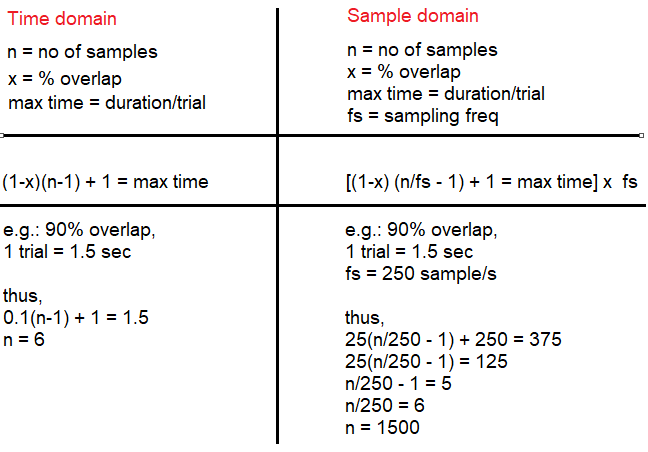

In [47]:
# This function will return array of overlapped data in sample domain
def overlap(fs, E_data, overlap):
    nel = E_data.shape[1] # no. of electrode 22
    dur = E_data.shape[2] # 313
    inc = int((round(1-overlap,1))*fs)
#     inc = round(np.int(1-overlap,1)*fs) # increment 
    fold = int((dur - fs)/inc) + 1
#     n = fold x fs # n is number of data after overlapped
    
    # Prepare the array to store overlapped data
    # Should be dimension of no.trials*fold x no. of eletrode x np. of overlapped samples
    E_data_new = np.zeros((E_data.shape[0]*3, nel, fs))
    
    # Overlapping data
    for i in range(E_data.shape[0]):
        for j in range(fold):
            temp = E_data[i][:, j*25:j*25+fs]
            E_data_new[(i*3)+(j)] = temp
    
    return E_data_new

In [48]:
help(overlap)

Help on function overlap in module __main__:

overlap(fs, E_data, overlap)
    # This function will return array of overlapped data in sample domain



In [49]:
E_l_ol90 = ['E0' + str(i) + '_l_ol90']

In [50]:
# globals()[E_l_ol90].shape

In [51]:
# Make this function with keyword argument!!
for i in range(1, ns+1):
    E_l_ol90 = 'E0' + str(i) + '_l_ol90'
    E_r_ol90 = 'E0' + str(i) + '_r_ol90'
    
    E_l = globals()['E0' + str(i) + '_left']
    E_r = globals()['E0' + str(i) + '_right']
    
    globals()[E_l_ol90] = overlap(250, E_l, 0.9)
    globals()[E_r_ol90] = overlap(250, E_r, 0.9)
    
# # Subject01 
# E_left01_ol90 = overlap(250, E01_left, 0.9)
# E_right01_ol90 = overlap(250, E01_right, 0.9)

# # Subject02 
# E_left02_ol90 = overlap(250, E02_left, 0.9)
# E_right02_ol90 = overlap(250, E02_right, 0.9)

In [52]:
E01_l_ol90.shape, E01_r_ol90.shape

((216, 22, 250), (216, 22, 250))

In [53]:
dframe(E09_l_ol90[6]).head()

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,5.224609,2.539062,5.419922,1.220703,-2.099609,0.439453,2.441406,3.955078,4.150391,6.933594,...,18.310547,16.357422,16.357422,14.550781,11.279297,3.027344,-0.976562,1.269531,-0.634766,-1.904297
1,10.009766,5.761719,4.101562,3.173828,-4.882812,-4.003906,-4.296875,-8.251953,-10.644531,-1.660156,...,13.867188,10.009766,7.373047,1.708984,5.224609,1.904297,-4.199219,-1.416016,-2.734375,-2.587891
2,9.570312,6.103516,6.005859,1.025391,-3.613281,-1.953125,-3.222656,-3.320312,-3.955078,2.050781,...,16.113281,11.425781,8.544922,7.128906,6.445312,0.146484,-4.736328,-2.050781,-1.855469,-2.148438
3,5.664062,3.173828,3.125000,1.513672,-2.978516,1.513672,3.369141,0.781250,-0.585938,10.253906,...,12.744141,11.035156,10.546875,4.736328,3.808594,1.171875,-1.904297,0.146484,-2.246094,-0.927734
4,7.421875,4.931641,4.833984,-0.146484,-2.929688,0.244141,1.757812,-0.097656,-1.220703,4.687500,...,13.427734,10.644531,9.423828,6.640625,4.687500,0.195312,-3.466797,-2.685547,-4.736328,-4.638672


In [54]:
# # Combine trial data with corresponding label '1' for left and '0' for right
# label_one = np.ones((E_left_ol09.shape[0], 1))
# label_zero = label_one * 0

## Split train, test, then covariance

In [55]:
'''
split3D will received 3D array of left and right trial with dimension of trial x electrodes x samples
and then split them based on the percentage n_tr
Parameter: 
    * E_left, E_right, 3D array
    * n_tr, % portion of data to be split as train data, the rest will serve as test data, allowed range(0.0 - 1.0)

Return: E_left_tr, E_right_tr, E_left_te, E_right_te
'''
def split3D(E_left, E_right, percent_tr):
    if E_left.shape[0] != E_right.shape[0]:
        return "Left and right class dont have equal number of trials"
    else:
        ntr = round(E_left.shape[0]*percent_tr)
        nte = E_left.shape[0] - ntr
        E_left_tr = E_left[:ntr]
        E_right_tr = E_right[:ntr]
        E_left_te = E_left[ntr:ntr+nte]
        E_right_te = E_right[ntr:ntr+nte]
        
        return E_left_tr, E_right_tr, E_left_te, E_right_te
    

In [56]:
help(split3D)

Help on function split3D in module __main__:

split3D(E_left, E_right, percent_tr)



In [57]:
# Splitting all data into training and test
# -------- Normal Data ------------
for i in range(1, ns+1):
    E_l_tr = 'E0' + str(i) + '_l_tr'
    E_r_tr = 'E0' + str(i) + '_r_tr'
    
    E_l_te = 'E0' + str(i) + '_l_te'
    E_r_te = 'E0' + str(i) + '_r_te'
    
    E_l = globals()['E0' + str(i) + '_left']
    E_r = globals()['E0' + str(i) + '_right']
    
    globals()[E_l_tr], globals()[E_r_tr],\
    globals()[E_l_te], globals()[E_r_te] = split3D(E_l, E_r, 0.8)

# -------- 90% Overlapped Data ---------
for i in range(1, ns+1):
    E_l_ol90_tr = 'E0' + str(i) + '_l_ol90_tr'
    E_r_ol90_tr = 'E0' + str(i) + '_r_ol90_tr'
    
    E_l_ol90_te = 'E0' + str(i) + '_l_ol90_te'
    E_r_ol90_te = 'E0' + str(i) + '_r_ol90_te'
    
    E_l_ol90 = globals()['E0' + str(i) + '_l_ol90']
    E_r_ol90 = globals()['E0' + str(i) + '_r_ol90']
    
    globals()[E_l_ol90_tr], globals()[E_r_ol90_tr],\
    globals()[E_l_ol90_te], globals()[E_r_ol90_te] = split3D(E_l_ol90, E_r_ol90, 0.8)


# # Subject 01
# E01_left_tr, E01_right_tr, E01_left_te, E01_right_te = split3D(E01_left, E01_right, 0.8)

# # Subject 02
# E02_left_tr, E02_right_tr, E02_left_te, E02_right_te = split3D(E02_left, E02_right, 0.8)

# # Subject 03
# E03_left_tr, E03_right_tr, E03_left_te, E03_right_te = split3D(E03_left, E03_right, 0.8)


cek_l_tr, cek_r_tr, cek_l_te, cek_r_te = split3D(E01_l_ol90, E01_l_ol90, 0.8)

In [58]:
cek_l_tr.shape, cek_r_tr.shape

((173, 22, 250), (173, 22, 250))

In [59]:
E01_l_tr.shape, E01_r_tr.shape, E01_l_te.shape, E01_r_te.shape

((58, 22, 313), (58, 22, 313), (14, 22, 313), (14, 22, 313))

In [60]:
E01_l_ol90_tr.shape, E01_r_ol90_tr.shape, E01_l_ol90_te.shape, E01_r_ol90_te.shape

((173, 22, 250), (173, 22, 250), (43, 22, 250), (43, 22, 250))

In [61]:
dframe(E01_l_ol90_tr[0]).head()

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,1.220703,5.468750,4.345703,2.294922,0.146484,5.468750,6.591797,6.298828,13.574219,16.699219,...,-0.537109,2.148438,3.710938,12.402344,6.347656,3.417969,-1.611328,-1.757812,-5.419922,0.195312
1,3.808594,4.052734,5.029297,7.470703,1.757812,5.126953,1.611328,4.638672,8.251953,14.843750,...,1.367188,-0.781250,5.566406,12.060547,3.417969,0.244141,-3.906250,0.439453,-5.273438,2.392578
2,1.757812,6.152344,5.566406,2.685547,0.000000,4.101562,3.906250,5.371094,13.769531,18.994141,...,-3.320312,-0.146484,2.148438,9.667969,2.929688,0.683594,-3.173828,-3.515625,-7.812500,-1.562500
3,3.759766,1.904297,0.781250,0.976562,-5.322266,2.636719,2.441406,7.568359,13.232422,20.605469,...,-1.855469,-3.515625,-0.244141,8.837891,1.416016,-1.416016,-6.689453,-5.468750,-10.888672,-3.027344
4,1.367188,5.810547,3.564453,-0.683594,-3.027344,3.710938,5.078125,6.689453,16.601562,20.166016,...,-6.689453,-2.343750,-1.318359,7.763672,3.417969,1.025391,-4.101562,-4.199219,-9.912109,-4.199219


In [62]:
dframe(E01_r_ol90_tr[0]).head()

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,17.871094,16.650391,11.669922,5.908203,3.369141,6.445312,8.935547,14.599609,13.623047,16.406250,...,-2.148438,-0.927734,3.076172,9.912109,13.330078,15.527344,6.445312,1.367188,-4.785156,-8.056641
1,13.037109,13.867188,10.351562,7.373047,5.566406,2.832031,9.619141,10.937500,13.476562,12.841797,...,3.173828,3.662109,8.935547,13.769531,17.041016,16.992188,7.666016,0.830078,-1.806641,-5.371094
2,17.480469,16.601562,11.523438,5.957031,4.882812,7.226562,10.107422,15.820312,13.720703,15.576172,...,1.953125,3.466797,7.812500,14.990234,17.626953,16.406250,6.884766,0.048828,-5.664062,-9.814453
3,17.822266,17.041016,12.255859,7.373047,4.443359,3.955078,10.205078,11.865234,15.625000,14.306641,...,5.468750,2.587891,6.689453,10.058594,13.525391,13.281250,5.224609,-1.318359,-4.003906,-8.349609
4,15.332031,14.111328,8.740234,3.808594,3.222656,5.371094,8.447266,13.574219,12.890625,17.089844,...,4.492188,3.417969,4.687500,8.349609,10.351562,10.107422,0.585938,-3.759766,-8.691406,-10.937500


## Processing Training Data

### Spatial Covariance and Composite Covariance
Calculating normalized spatial covariance of each trial and composite variance
$$ C = \frac{EE'}{trace(EE')}$$
' denotes transpose

Then calculate the average of left and right covariance:
$$\overline{C}_d, \epsilon[l, r]$$

The composite average covariance is given as:
$$ C_c = \overline{C_l} + \overline{C_r}$$

  
  

In [63]:
'''
compCov receive left and right class 3D array with dimension of trial x electrodes x samples
Then calculate the covariance of each class, average them, and add them together
Finally, this function returns 2D composite covariance
Parameter: 
    * E_left, E_right, each dimension must be the same
Return: composite averaged covariance
'''
def compCov(E_left, E_right):
    nel = E_left.shape[1]
    Cov_left = np.zeros((E_left.shape[0], nel, nel))
    Cov_right = np.zeros((E_right.shape[0], nel, nel))

    for i in range(E_left.shape[0]):
        Cov_left[i, :, :] = (E_left[i, :, :]@E_left[i, :, :].T)/np.trace(E_left[i, :, :]@E_left[i, :, :].T)

    for i in range(E_right.shape[0]):
        Cov_right[i, :, :] = (E_right[i, :, :]@E_right[i, :, :].T)/np.trace(E_right[i, :, :]@E_right[i, :, :].T)
        
    # Average covariance left and right    
    avgCov_l = np.sum(Cov_left, axis=0)/Cov_left.shape[0]
    avgCov_r = np.sum(Cov_right, axis=0)/Cov_right.shape[0]
    
    avgCov_c = avgCov_l + avgCov_r
    return avgCov_c, avgCov_l, avgCov_r
    

In [64]:
help(compCov)

Help on function compCov in module __main__:

compCov(E_left, E_right)



In [65]:
E01_l_tr.shape, E01_r_tr.shape

((58, 22, 313), (58, 22, 313))

In [66]:
for i in range(1, ns+1):
    Cov_l_tr = 'Cov0' + str(i) + '_l_tr'
    Cov_r_tr = 'Cov0' + str(i) + '_r_tr'
    Cov_c_tr = 'Cov0' + str(i) + '_c_tr'
    
    E_l_tr = globals()['E0' + str(i) + '_l_tr']
    E_r_tr = globals()['E0' + str(i) + '_r_tr']
    
    globals()[Cov_c_tr], globals()[Cov_l_tr], globals()[Cov_r_tr] = compCov(E_l_tr, E_r_tr)
    
for i in range(1, ns+1):
    Cov_l_ol90_tr = 'Cov0' + str(i) + '_l_ol90_tr'
    Cov_r_ol90_tr = 'Cov0' + str(i) + '_r_ol90_tr'
    Cov_c_ol90_tr = 'Cov0' + str(i) + '_c_ol90_tr'
    
    E_l_ol90_tr = globals()['E0' + str(i) + '_l_ol90_tr']
    E_r_ol90_tr = globals()['E0' + str(i) + '_r_ol90_tr']
    
    globals()[Cov_c_ol90_tr], globals()[Cov_l_ol90_tr], globals()[Cov_r_ol90_tr] = compCov(E_l_ol90_tr, E_r_ol90_tr)
     
#     E_l_ol90_tr = 'E0' + str(i) + '_l_ol90_tr'
#     E_r_ol90_tr = 'E0' + str(i) + '_r_ol90_tr'


In [67]:
# cekcov_c, cekcov_l, cekcov_r = compCov(cek_l_tr, cek_l_tr)

In [68]:
# # Subject 01
# Cov01_c_tr, Cov01_l_tr, Cov01_r_tr = compCov(E01_left_tr, E01_right_tr)

# # Subject 02
# Cov02_c_tr, Cov02_l_tr, Cov02_r_tr = compCov(E02_left_tr, E02_right_tr)

# # Subject 03
# Cov03_c_tr, Cov03_l_tr, Cov03_r_tr = compCov(E03_left_tr, E03_right_tr)

# # Subject 04
# Cov04_c_tr, Cov04_l_tr, Cov04_r_tr = compCov(E04_left_tr, E04_right_tr)

# # Subject 05
# Cov05_c_tr, Cov05_l_tr, Cov05_r_tr = compCov(E05_left_tr, E05_right_tr)

In [69]:
Cov01_c_ol90_tr.shape

(22, 22)

In [70]:
dframe(Cov01_r_tr).head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.051033,0.043618,0.049290,0.051621,0.050005,0.045454,0.028832,0.037144,0.043613,0.046912,...,0.030458,0.032324,0.037393,0.038080,0.037546,0.033781,0.029527,0.031111,0.029105,0.024156
1,0.043618,0.045423,0.047026,0.047759,0.044092,0.040504,0.031869,0.040655,0.043724,0.046110,...,0.027062,0.036141,0.038553,0.039053,0.036849,0.032567,0.032169,0.032583,0.029785,0.025928
2,0.049290,0.047026,0.052584,0.053111,0.050426,0.044601,0.032631,0.041984,0.048359,0.051103,...,0.030374,0.037226,0.042403,0.042551,0.040883,0.036064,0.034144,0.035322,0.032520,0.027720
3,0.051621,0.047759,0.053111,0.058264,0.053653,0.049356,0.031196,0.042440,0.048850,0.054553,...,0.032310,0.038080,0.042662,0.045239,0.043508,0.038488,0.034576,0.036483,0.034006,0.028342
4,0.050005,0.044092,0.050426,0.053653,0.053652,0.049463,0.030238,0.039720,0.047030,0.051626,...,0.034761,0.035799,0.041961,0.043468,0.043234,0.039399,0.034149,0.036559,0.034565,0.028928


In [71]:
dframe(Cov01_l_tr).head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.052213,0.045385,0.050746,0.052692,0.051021,0.046694,0.030230,0.038472,0.045342,0.048198,...,0.032683,0.032136,0.038179,0.039442,0.038987,0.034939,0.029171,0.031926,0.030073,0.023633
1,0.045385,0.046901,0.048730,0.048965,0.045369,0.041746,0.032639,0.041423,0.045168,0.047100,...,0.028478,0.035343,0.038832,0.039859,0.037610,0.033008,0.031151,0.032604,0.030003,0.024826
2,0.050746,0.048730,0.054333,0.054294,0.051783,0.046141,0.033804,0.043223,0.050089,0.052409,...,0.032623,0.036941,0.043131,0.043998,0.042341,0.037240,0.033784,0.036077,0.033528,0.027189
3,0.052692,0.048965,0.054294,0.058671,0.054533,0.050330,0.032150,0.043135,0.050198,0.055303,...,0.034504,0.037174,0.043072,0.046106,0.044508,0.039370,0.033778,0.036827,0.034601,0.027322
4,0.051021,0.045369,0.051783,0.054533,0.054482,0.050298,0.031211,0.040597,0.048560,0.052862,...,0.036871,0.035134,0.042522,0.044666,0.044506,0.040428,0.033273,0.036859,0.035169,0.027719


### Decompose Covariance Matrix
Eigendecompose matrix $C_c$, such that
$$C_c = U_c\lambda_cU'_c$$
The eigenvalues in this calculated are sorted in descending order

In [72]:
'''
'''
def decomposeCov(avgCov):
    λ, V = np.linalg.eig(avgCov)
    λ_dsc = np.sort(λ)[::-1] # Sort eigenvalue descending order, default is ascending order sort
    idx_dsc = np.argsort(λ)[::-1]
    V_dsc = V[:, idx_dsc] # Sort eigenvectors descending order
    λ_dsc = np.diag(λ_dsc) # Diagonalize λ_dsc
    return λ_dsc, V_dsc

In [73]:
# ------- Normal Data -------------------
for i in range(1, ns+1):
    λ_dsc = 'λ0' + str(i) + '_dsc'
    V_dsc = 'V0' + str(i) + '_dsc'
    
    Cov_tr = globals()['Cov0' + str(i) + '_c_tr']
    
    globals()[λ_dsc], globals()[V_dsc] = decomposeCov(Cov_tr)

# ------- Overlapped Data ---------------
for i in range(1, ns+1):
    λ_ol90_dsc = 'λ0' + str(i) + '_ol90_dsc'
    V_ol90_dsc = 'V0' + str(i) + '_ol90_dsc'
    
    Cov_ol90_tr = globals()['Cov0' + str(i) + '_c_ol90_tr']
    
    globals()[λ_ol90_dsc], globals()[V_ol90_dsc] = decomposeCov(Cov_ol90_tr)    
    
# # Subject 01
# λ01_dsc, V01_dsc = decomposeCov(Cov01_c_tr)

# # Subject 02
# λ02_dsc, V02_dsc = decomposeCov(Cov02_c_tr)

# # Subject 03
# λ03_dsc, V03_dsc = decomposeCov(Cov03_c_tr)

In [74]:
# lam, V = decomposeCov

In [75]:
dframe(λ01_ol90_dsc)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.714731,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,0.000000,0.133505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,0.000000,0.000000,0.065839,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,0.000000,0.000000,0.000000,0.023868,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4,0.000000,0.000000,0.000000,0.000000,0.019312,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.010927,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008021,0.000000,0.000000,0.0000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004623,0.000000,0.0000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004125,0.0000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0032,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


### White Transformation Matrix P 
Construct the whiten transformation matrix P:
$$P = \sqrt{\lambda_c^{-1}}U'_c$$
<br>
The whitening transformation equalizes the variances in the space spanned by $U_c$, i.e., all eigenvalues of ${PC_CP'}$ are equal to identity matrix.

In [76]:
'''
'''
def whiteMatrix(λ_dsc, V_dsc):
    λ_dsc_sqr = np.sqrt(np.linalg.inv(λ_dsc))
    P = (λ_dsc_sqr)@(V_dsc.T)
    
    return P

'''
'''
def ifWhiteIdentity(P, Cov_c):
    # Try if eigenval of PCcP' equal to identity matrix
    temp = P@Cov_c@P.T
    temp = np.diag(np.linalg.eigvals(temp))
    
    return abs(temp)

In [77]:
# Computing White Transformation Matrix P
print('Computing white transformation matrix....\n')

# ------- Normal Data -------------------
for i in range(1, ns+1):
    λ_dsc = globals()['λ0' + str(i) + '_dsc']
    V_dsc = globals()['V0' + str(i) + '_dsc']
    P = 'P0' + str(i)
    
    globals()[P] = whiteMatrix(λ_dsc, V_dsc)


# ------- 90% Overlapped Data ---------------
for i in range(1, ns+1):
    λ_ol90_dsc = globals()['λ0' + str(i) + '_ol90_dsc']
    V_ol90_dsc = globals()['V0' + str(i) + '_ol90_dsc']
    
    P_ol90 = 'P0' + str(i) + '_ol90'
    
    globals()[P_ol90] = whiteMatrix(λ_ol90_dsc, V_ol90_dsc)

# # Subject 01
# P01 = whiteMatrix(λ01_dsc, V01_dsc)

# # Subject 02
# P02 = whiteMatrix(λ02_dsc, V02_dsc)

print('White transfomartion has dimension of: ', P01.shape)

Computing white transformation matrix....

White transfomartion has dimension of:  (22, 22)


In [78]:
P01_ol90.shape

(22, 22)

In [79]:
dframe(P05).head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.159693,0.157217,0.168124,0.171567,0.171866,0.160244,0.124644,0.154079,0.171124,0.177401,...,0.139129,0.155989,0.168089,0.173652,0.172818,0.163519,0.158444,0.168006,0.161375,0.150959
1,1.025052,0.553940,0.602821,0.714508,0.567466,0.512639,0.149505,0.120211,0.165900,0.205788,...,0.018910,-0.301508,-0.295446,-0.313856,-0.314673,-0.313475,-0.728555,-0.744930,-0.773887,-1.121025
2,0.276595,-1.332493,-0.661464,0.056656,0.772654,1.355934,-1.636584,-1.457863,-0.807477,-0.120604,...,1.765226,-1.228476,-0.602243,-0.135174,0.506777,1.078563,-0.469616,-0.041233,0.455077,0.034074
3,3.737199,1.074349,0.258879,-1.315851,0.062444,0.562464,2.466430,-0.582056,-1.143427,-3.434109,...,1.717070,-0.244185,-0.489497,-2.331366,-1.090878,0.005289,0.931491,0.315562,1.014426,2.470809
4,2.992125,-0.770194,1.340816,2.093575,1.159519,-0.848364,-3.656174,-2.191245,0.166844,0.773362,...,-3.865301,-1.441307,0.137381,0.312230,-0.147912,-1.691507,1.143579,1.079653,1.060942,2.514121


In [80]:
# Try if eigenval of PCcP' equal to identity matrix
temp = ifWhiteIdentity(P02_ol90, Cov02_c_ol90_tr)

In [81]:
dframe(temp)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Spatial Matrix
Spatial matrix is a transformation of $\overline{C_l}$ and $\overline{C_r}$ into:
$$S_1 = P\overline{C_1}P'$$  and   $$S_r = P\overline{C_r}P'$$

In [82]:
def spatial(P, Cov_l, Cov_r):
    # Use this whitening matrix transform Sl and Sr as follows
    # Sl = P Cl P'
   
    S_left = P@Cov_l@P.T
    # Sr = P Cr P'
    S_right = P@Cov_r@P.T
    return S_left, S_right

In [83]:
Cov01_l_tr.shape

(22, 22)

In [84]:
# ------- Normal Data -------------------
for i in range(1, ns+1):
    S_l = 'S0' + str(i) + '_l'
    S_r = 'S0' + str(i) + '_r'
    
    P = globals()['P0' + str(i)]
    
    Cov_l = globals()['Cov0' + str(i) + '_l_tr']
    Cov_r = globals()['Cov0' + str(i) + '_r_tr']
    
    globals()[S_l], globals()[S_r] = spatial(P, Cov_l, Cov_r)

    
# ------- 90% Overlapped Data ---------------
for i in range(1, ns+1):
    S_l_ol90 = 'S0' + str(i) + '_l_ol90'
    S_r_ol90 = 'S0' + str(i) + '_r_ol90'
    
    P_ol90 = globals()['P0' + str(i) + '_ol90']
    
    Cov_l_ol90_tr = globals()['Cov0' + str(i) + '_l_ol90_tr']
    
    Cov_r_ol90_tr = globals()['Cov0' + str(i) + '_r_ol90_tr']

    
    globals()[S_l_ol90], globals()[S_r_ol90] = spatial(P_ol90, Cov_l_ol90_tr, Cov_r_ol90_tr)


In [85]:
# # Subject 01
# S01_l, S01_r = spatial(P01, Cov01_l_tr, Cov01_r_tr)

# # Subject 02
# S02_l, S02_r = spatial(P02, Cov02_l_tr, Cov02_r_tr)

# # Subject 03
# S03_l, S03_r = spatial(P03, Cov03_l_tr, Cov03_r_tr)

# # Subject 04
# S04_l, S04_r = spatial(P04, Cov04_l_tr, Cov04_r_tr)

# # Subject 05
# S05_l, S05_r = spatial(P05, Cov05_l_tr, Cov05_r_tr)

In [86]:
S02_l.shape, S02_r.shape

((22, 22), (22, 22))

In [87]:
S05_r_ol90

array([[ 5.01309324e-01, -1.68771004e-02,  2.72981209e-02,
        -3.06657403e-03,  3.42451977e-03,  3.59783720e-03,
         3.94160507e-04,  8.77954622e-03, -9.37337028e-03,
        -1.50549282e-02,  7.96963456e-03, -8.82529389e-03,
         8.27539699e-04,  1.45801945e-02, -5.38650247e-03,
        -1.45567941e-02,  3.65247587e-03, -1.00706802e-02,
        -3.14588910e-03, -1.97645680e-02,  5.09982000e-03,
        -9.35153864e-03],
       [-1.68771004e-02,  4.82630457e-01, -7.72779221e-02,
        -7.24965812e-04,  1.15023003e-02,  1.11672433e-03,
         5.50267968e-02,  2.99406650e-02, -1.32868012e-02,
         1.69857341e-02, -1.45442116e-02,  2.21933858e-02,
        -3.81238860e-02, -1.70502571e-02, -3.16111732e-02,
        -6.48822775e-03, -2.22721429e-02,  1.75440527e-02,
        -2.25151675e-02, -1.12386550e-02, -1.13335574e-02,
         6.52877974e-03],
       [ 2.72981209e-02, -7.72779221e-02,  5.09721245e-01,
        -2.38598149e-02, -1.73044265e-02,  5.94260465e-03,
    

### Projection matrix W

#### 1. Decomposing $Sl$ and $Sr$

Decompose $S_l$ and $S_r$ such that:
$$S_l = B{\lambda_l}B'$$ and 
$$S_r = B{\lambda_r}B'$$
<br>
Both $S_l$ and $S_r$ share common eigenvalues but in opposite magnitude order, thus by ordering them in ascending and descending order respectively, we can get<br> 
$$\lambda_l + \lambda_r = I$$  

In [88]:
'''
'''
def decomposeSpatial(S_left, S_right):
    # Decompose Sl and Sr
    λ_left, B_left = np.linalg.eig(S_left)
    λ_right, B_right = np.linalg.eig(S_right)
    
    # Sort left eigenvalues, ascending order
    idx_asc = λ_left.argsort() # Use this index to sort eigenvector smallest -> largest
    λ_left_asc = λ_left[idx_asc]
    
    # Sort left eigenvector, ascending order
    B_left = B_left[:, idx_asc]
    
    # Sort right eigenvector, descending order
    idx_dsc = λ_right.argsort()[::-1] # Use this index to sort eigenvector largest -> smallest
    λ_right_dsc = λ_right[idx_dsc]
    
    # Sort right eigenvector, descending order
    B_right = B_right[:, idx_dsc]
    
    return B_left, B_right, λ_left_asc, λ_right_dsc 

'''
'''
def ifSpatialIdentity(λ_left_asc, λ_right_dsc):
    ones = λ_left_asc + λ_right_dsc
    return ones

In [89]:
# ------- Normal Data -------------------
for i in range(1, ns+1):
    S_l = globals()['S0' + str(i) + '_l']
    S_r = globals()['S0' + str(i) + '_r']
    
    B_l = 'B0' + str(i) + '_l'
    B_r = 'B0' + str(i) + '_r'
    
    λ_l_asc = 'λ0' + str(i) + '_l_asc'
    λ_r_dsc = 'λ0' + str(i) + '_r_dsc'
    
    globals()[B_l], globals()[B_r],\
    globals()[λ_l_asc],  globals()[λ_r_dsc] = decomposeSpatial(S_l, S_r)

# ------- 90% Overlapped Data ---------------
for i in range(1, ns+1):
    S_l_ol90 = globals()['S0' + str(i) + '_l_ol90']
    S_r_ol90 = globals()['S0' + str(i) + '_r_ol90']
    
    B_l_ol90 = 'B0' + str(i) + '_l_ol90'
    B_r_ol90 = 'B0' + str(i) + '_r_ol90'
    
    λ_l_asc_ol90 = 'λ0' + str(i) + '_l_asc_ol90'
    λ_r_dsc_ol90 = 'λ0' + str(i) + '_r_dsc_ol90'
    
    globals()[B_l_ol90], globals()[B_r_ol90],\
    globals()[λ_l_asc_ol90], globals()[λ_r_dsc_ol90] = decomposeSpatial(S_l_ol90, S_r_ol90)

In [90]:
# # Subject 01
# B01_left, B01_right, lambda01_asc, lambda01_dsc = decomposeSpatial(S01_l, S01_r)

# # Subject 02
# B02_left, B02_right, lambda02_asc, lambda02_dsc = decomposeSpatial(S02_l, S02_r)

In [91]:
λ02_r_dsc + λ02_l_asc

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.])

In [92]:
ifSpatialIdentity(λ09_l_asc_ol90, λ09_r_dsc_ol90)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.])

#### 2. Computing Projection Matrix
Projection Matrix W is given as:
$$W = (B'P)'$$

' denotes transposed

In [93]:
def projectionMatrix(B_left, B_right, P):
    # Since Bl and Br share common values, we can pick one of them as B
    # To verify try compute W1 and W2 using Br and Bl respectively
    W1 = (B_right.T@P).T
    W2 = (B_left.T@P).T
    return W1, W2

In [94]:
# ------- Normal Data -------------------
for i in range(1, ns+1):
    B_l = globals()['B0' + str(i) + '_l']
    B_r = globals()['B0' + str(i) + '_r']
    
    P = globals()['P0' + str(i)]
    
    W1 = 'W0' + str(i) + '_1'
    W2 = 'W0' + str(i) + '_2'
    
    globals()[W1], globals()[W2] = projectionMatrix(B_l, B_r, P)
    
# ------- 90% Overlapped Data ---------------
for i in range(1, ns+1):
    B_l_ol90 = globals()['B0' + str(i) + '_l_ol90']
    B_r_ol90 = globals()['B0' + str(i) + '_r_ol90']
    
    P_ol90 = globals()['P0' + str(i) + '_ol90']
    
    W_1_ol90 = 'W0' + str(i) + '_1_ol90'
    W_2_ol90 = 'W0' + str(i) + '_2_ol90'
    
    globals()[W_1_ol90], globals()[W_2_ol90] = projectionMatrix(B_l_ol90, B_r_ol90, P_ol90)


In [95]:
# # Subject 01
# W01_1, W01_2 = projectionMatrix(B01_left, B01_right, P01)

# # Subject 02
# W02_1, W02_2 = projectionMatrix(B02_left, B02_right, P02)

In [96]:
P01.shape

(22, 22)

In [97]:
W01_1.shape, W01_2.shape

((22, 22), (22, 22))

In [98]:
# Print first 10 rows of W1 and W2 should share same result
dframe(W01_1[:10, :22]).head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.896498,-3.840941,-5.789683,-2.130876,-2.045992,2.618398,1.708485,-0.251773,2.956089,-0.248628,...,8.695932,2.060527,4.380647,-6.363505,5.360964,2.199162,-3.172863,4.870019,1.061110,0.209678
1,-0.086910,3.710184,0.937246,1.138179,-1.835529,-1.079586,-5.672415,7.560932,2.030863,4.841608,...,-0.090971,-7.399449,3.846832,0.776104,-9.702527,-3.872256,4.463003,5.603094,7.452326,4.043637
2,1.585208,1.151959,-2.069092,-0.476465,-0.085205,2.454653,4.954294,-2.155545,-2.972264,-3.667838,...,-0.686509,12.929027,-5.803508,-1.405478,-1.977307,4.849571,9.386475,-13.065061,-12.006219,0.422278
3,-1.935021,2.062379,1.711964,-3.335441,8.353351,2.039118,-0.659065,3.418785,-6.502913,-6.620443,...,-6.381040,-5.714015,-3.907332,-3.814422,1.040769,-4.903323,-4.024486,3.880878,1.077299,1.121499
4,0.884828,-3.086698,12.752976,7.791939,-4.074991,3.897754,-14.386159,-7.643940,3.993235,7.787148,...,-2.341716,1.060327,-7.200834,13.439954,-8.539784,-0.726613,0.623917,-4.686289,20.395891,-10.810660


In [99]:
dframe(W01_2[:10, :22]).head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-0.896498,-3.840941,-5.789683,-2.130876,-2.045992,2.618398,1.708485,-0.251773,2.956089,-0.248628,...,8.695932,2.060527,4.380647,-6.363505,5.360964,2.199162,-3.172863,4.870019,1.061110,-0.209678
1,0.086910,3.710184,0.937246,1.138179,-1.835529,-1.079586,-5.672415,7.560932,2.030863,4.841608,...,-0.090971,-7.399449,3.846832,0.776104,-9.702527,-3.872256,4.463003,5.603094,7.452326,-4.043637
2,-1.585208,1.151959,-2.069092,-0.476465,-0.085205,2.454653,4.954294,-2.155545,-2.972264,-3.667838,...,-0.686509,12.929027,-5.803508,-1.405478,-1.977307,4.849571,9.386475,-13.065061,-12.006219,-0.422278
3,1.935021,2.062379,1.711964,-3.335441,8.353351,2.039118,-0.659065,3.418785,-6.502913,-6.620443,...,-6.381040,-5.714015,-3.907332,-3.814422,1.040769,-4.903323,-4.024486,3.880878,1.077299,-1.121499
4,-0.884828,-3.086698,12.752976,7.791939,-4.074991,3.897754,-14.386159,-7.643940,3.993235,7.787148,...,-2.341716,1.060327,-7.200834,13.439954,-8.539784,-0.726613,0.623917,-4.686289,20.395891,10.810660


In [100]:
# Finally just pick one W as projection matrix
for i in range(1, ns+1):
    W = 'W0' + str(i)
    W_1 = globals()['W0' + str(i) + '_1']
    
    globals()[W] = W_1

for i in range(1, ns+1):
    W_ol90 = 'W0' + str(i) + '_ol90'
    W_1_ol90 = globals()['W0' + str(i) + '_1_ol90']
    
    globals()[W_ol90] = W_1_ol90

In [101]:
# # Finally just pick one W as projection matrix
# # Subject 01 
# W01 = W01_1

# # Subject 02 
# W02 = W02_1

In [102]:
dframe(W04_ol90).head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-1.902050,-6.887787,-3.989307,2.005975,0.516811,-1.436059,-8.598570,-3.534398,3.145193,0.557527,...,-6.220333,-0.193853,-0.512744,-4.567888,-2.786280,6.896385,1.041917,1.251153,4.614645,2.737762
1,-2.023586,-0.709854,1.011242,5.265086,-1.564310,4.467683,2.153976,-0.404515,-3.127765,-6.474868,...,-5.179229,0.846600,-4.299066,0.536287,-2.706455,-13.713923,-3.013895,3.568026,-3.704178,4.916884
2,-13.059422,5.854605,3.460834,-11.699582,-1.847006,-5.190729,6.620012,3.888986,7.476210,3.975089,...,-0.294887,-0.239941,6.365126,13.311016,4.250564,4.923112,2.996834,-3.642872,-4.325704,-1.089971
3,8.985333,5.178971,7.898738,9.840569,10.607437,4.792178,0.495180,-1.758576,-2.560397,-1.628108,...,1.445723,-1.700565,-5.744550,-3.750655,4.058521,1.699818,-1.206890,-0.912819,-4.271571,-10.022434
4,-2.012775,-2.302565,-1.671563,-2.249608,-7.693877,-0.709010,-3.468111,-3.218669,-1.829979,-0.763443,...,8.578642,6.440382,4.439532,-7.550560,3.473960,-6.891500,-3.723062,2.721383,2.576352,-2.121385


### Feature Vector for Training Data
Finding feature vector $f_p$. The feature vector $f_p$ is given as:
$$f_p = log(\frac{var(Z_p)}{\sum_{i=1}^{2m}var(Z_i)})$$
<br>
where,<br>
$var(Z_p)$ denotes variance of samples in each row $p$, from 1 to 2m 
<br>
$\sum_{i=1}^{2m}var(Z_i)$ denotes sum over all variances of samples in row 1 to 2m

In [103]:
# Used the projection matrix W from training dataset
W01.shape

(22, 22)

In [104]:
def newW(W, m):
    # So take the first m of first and last row of matrix
    # And remove the rest of matrix row
    x, y = W.shape
    W_new = np.delete(W, np.s_[m+1:x-m+1], 0)
    
    return W_new

In [105]:
help(newW)

Help on function newW in module __main__:

newW(W, m)



In [106]:
# # Let's follow the procedure in the paper and set m = 2
# # So 2m = 4
# m = 2
# # ------- Normal Data -------------------
# for i in range(1, ns+1):
#     W = globals()['W0' + str(i)]
    
#     W = newW(W, 2)





# # ------- 90% Overlapped Data ---------------
#     W_ol90 = globals()['W0' + str(i) + '_ol90']




In [107]:
# Let's follow the procedure in the paper and set m = 2
# So 2m = 4
m = 2

# Subject 01
W01 = newW(W01, m)

# Subject 02
W02 = newW(W02, m)

# Subject 03
W03 = newW(W03, m)

# Subject 04
W04 = newW(W04, m)

# Subject 05
W05 = newW(W05, m)

# Subject 06
W06 = newW(W06, m)

# Subject 07
W07 = newW(W07, m)

# Subject 08
W08 = newW(W08, m)

# Subject 09
W09 = newW(W09, m)

In [108]:
# Overlap data
# Subject 01
W01_ol90 = newW(W01_ol90, m)

# Subject 02
W02_ol90 = newW(W02_ol90, m)

# Subject 03
W03_ol90 = newW(W03_ol90, m)

# Subject 04
W04_ol90 = newW(W04_ol90, m)

# Subject 05
W05_ol90 = newW(W05_ol90, m)

# Subject 06
W06_ol90 = newW(W06_ol90, m)

# Subject 07
W07_ol90 = newW(W07_ol90, m)

# Subject 08
W08_ol90 = newW(W08_ol90, m)

# Subject 09
W09_ol90 = newW(W09_ol90, m)

In [109]:
# Shape of new W
# print(i)
W01_ol90.shape

(4, 22)

So now we have matrix W with dimension of $2m * N$

Apply this matrix to original EEG trial signals E with the dim $N*T$ to obtain $Z$ with dim of $2m * T$

Now calculate Z

        Z = W * E
    2m x N = 2m x N * N x T 

In [110]:
E01_l_tr.shape, E01_r_tr.shape

((58, 22, 313), (58, 22, 313))

In [111]:
E01_l_ol90_tr.shape, E01_r_ol90_tr.shape

((173, 22, 250), (173, 22, 250))

In [112]:
'''
'''
def computeZ(E_left, E_right, W):
    # Tranposing E to dimension of 18 x 22 x 313
    if E_left.shape[1] != 22 :
        E_left = np.transpose(E_left, (0, 2, 1))
    if E_right.shape[1] != 22 :
        E_right = np.transpose(E_left, (0, 2, 1))
        
    # New array of zeros for Z
    Z_left = np.zeros((E_left.shape[0], W.shape[0], E_left.shape[2]))
    Z_right = np.zeros((E_right.shape[0], W.shape[0], E_right.shape[2]))
    
    # For left class
    for i in range(Z_left.shape[0]):
        Z_left[i] = W@E_left[i]

    # For right class
    for i in range(Z_right.shape[0]):
        Z_right[i] = W@E_right[i]
        
    return Z_left, Z_right

In [113]:
help(computeZ)

Help on function computeZ in module __main__:

computeZ(E_left, E_right, W)



In [114]:
W01_ol90.shape

(4, 22)

In [115]:
# ------- Normal Data -------------------
for i in range(1, ns+1):
    E_l_tr = globals()['E0' + str(i) + '_l_tr']
    E_r_tr = globals()['E0' + str(i) + '_r_tr']
    W = globals()['W0' + str(i)]
    
    Z_l = 'Z0' + str(i) + '_l'
    Z_r = 'Z0' + str(i) + '_r'
    
    globals()[Z_l], globals()[Z_r] = computeZ(E_l_tr, E_r_tr, W)

    
# ------- 90% Overlapped Data ---------------
for i in range(1, ns+1):
    E_l_ol90_tr = globals()['E0' + str(i) + '_l_ol90_tr']
    E_r_ol90_tr = globals()['E0' + str(i) + '_r_ol90_tr']
    W_ol90 = globals()['W0' + str(i) +'_ol90']
    
    Z_l_ol90 = 'Z0' + str(i) + '_l_ol90'
    Z_r_ol90 = 'Z0' + str(i) + '_r_ol90'
    
    globals()[Z_l_ol90], globals()[Z_r_ol90] = computeZ(E_l_ol90_tr, E_r_ol90_tr, W_ol90)


In [116]:
# # Subject 01
# Z01_left, Z01_right = computeZ(E01_left_tr, E01_right_tr, W01)

# # Subject 02
# Z02_left, Z02_right = computeZ(E02_left_tr, E02_right_tr, W02)

# # Subject 03
# Z03_left, Z03_right = computeZ(E03_left_tr, E03_right_tr, W03)

In [117]:
Z01_l.shape, Z01_r.shape

((58, 4, 313), (58, 4, 313))

In [118]:
Z01_l_ol90.shape, Z01_r_ol90.shape

((173, 4, 250), (173, 4, 250))

In [119]:
# ===== Feature Vector ===== #
def featVector(Z_left, Z_right):
    # New array of zeros for training feature left and right
    feat_left =  np.zeros((Z_left.shape[0], Z_left.shape[1], 1))
    feat_right =  np.zeros((Z_right.shape[0], Z_right.shape[1], 1))
    
    # For left class
    for i in range(Z_left.shape[0]):
        var = np.var(Z_left[i], ddof=1, axis=1)[:, np.newaxis]
        varsum = np.sum(var)
        feat_left[i] = (var/varsum);

    # For right class
    for i in range(Z_right.shape[0]):
        var = np.var(Z_right[i], ddof=1, axis=1)[:, np.newaxis]
        varsum = np.sum(var)
        feat_right[i] = (var/varsum);
        
    return feat_left, feat_right

In [120]:
# ------- Normal Data -------------------
for i in range(1, ns+1):
    Z_l = globals()['Z0' + str(i) + '_l']
    Z_r = globals()['Z0' + str(i) + '_r']
    
    feat_l = 'feat0' + str(i) + '_l'
    feat_r = 'feat0' + str(i) + '_r'

    globals()[feat_l], globals()[feat_r] = featVector(Z_l, Z_r)    
    
# ------- 90% Overlapped Data ---------------
for i in range(1, ns+1):
    Z_l_ol90 = globals()['Z0' + str(i) + '_l_ol90']
    Z_r_ol90 = globals()['Z0' + str(i) + '_r_ol90']
    
    feat_l_ol90 = 'feat0' + str(i) + '_l_ol90'
    feat_r_ol90 = 'feat0' + str(i) + '_r_ol90'

    globals()[feat_l_ol90], globals()[feat_r_ol90] = featVector(Z_l_ol90, Z_r_ol90)    


In [121]:
# # Subject 01
# feat01_left, feat01_right = featVector(Z01_left, Z01_right)

# # Subject 02
# feat02_left, feat02_right = featVector(Z02_left, Z02_right)

# # Subject 03
# feat03_left, feat03_right = featVector(Z03_left, Z03_right)

# # Subject 04
# feat04_left, feat04_right = featVector(Z04_left, Z04_right)

# # Subject 05
# feat05_left, feat05_right = featVector(Z05_left, Z05_right)

In [122]:
feat01_l_ol90.shape, feat01_r_ol90.shape

((173, 4, 1), (173, 4, 1))

In [123]:
feat01_l.shape, feat01_r.shape

((58, 4, 1), (58, 4, 1))

In [124]:
# Adding corresponding label column to feature vector, then shuffle
def addLabel(feat_left, feat_right):
    # Reshape feature vector matrix to 2D
    feat_left = np.reshape(feat_left, (feat_left.shape[0], feat_left.shape[1]))
    feat_right = np.reshape(feat_right, (feat_right.shape[0], feat_right.shape[1]))
    
    # Label one for left and zero for right
    label_one = np.ones((feat_left.shape[0], 1))
    label_zero = label_one * 0
    
    # Add label to associated class
    feat_left = np.hstack([feat_left, label_one])
    feat_right = np.hstack([feat_right, label_zero])
    
    # Vertically stack them
    feat = np.vstack([feat_left, feat_right])
    
    # Shuffles them
    np.random.shuffle(feat)
    
    return feat

In [125]:
# ------- Normal Data -------------------
# Subject 01
feat01_tr = addLabel(feat01_l, feat01_r)

# Subject 02
feat02_tr = addLabel(feat02_l, feat02_r)

# Subject 03
feat03_tr = addLabel(feat03_l, feat03_r)

# Subject 04
feat04_tr = addLabel(feat04_l, feat04_r)

# Subject 05
feat05_tr = addLabel(feat05_l, feat05_r)

# Subject 06
feat06_tr = addLabel(feat06_l, feat06_r)

# Subject 07
feat07_tr = addLabel(feat07_l, feat07_r)

# Subject 08
feat08_tr = addLabel(feat08_l, feat08_r)

# Subject 09
feat09_tr = addLabel(feat09_l, feat09_r)


# ------- 90% Overlapped Data ---------------
# Subject 01
feat01_ol90_tr = addLabel(feat01_l_ol90, feat01_r_ol90)

# Subject 02
feat02_ol90_tr = addLabel(feat02_l_ol90, feat02_r_ol90)

# Subject 03
feat03_ol90_tr = addLabel(feat03_l_ol90, feat03_r_ol90)
                     
# Subject 04
feat04_ol90_tr = addLabel(feat04_l_ol90, feat04_r_ol90)

# Subject 05
feat05_ol90_tr = addLabel(feat05_l_ol90, feat05_r_ol90)

# Subject 06
feat06_ol90_tr = addLabel(feat06_l_ol90, feat06_r_ol90)
                     
# Subject 07
feat07_ol90_tr = addLabel(feat07_l_ol90, feat07_r_ol90)

# Subject 08
feat08_ol90_tr = addLabel(feat08_l_ol90, feat08_r_ol90)

# Subject 09
feat09_ol90_tr = addLabel(feat09_l_ol90, feat09_r_ol90)

In [126]:
type(feat01_tr)

numpy.ndarray

In [127]:
feat01_tr.shape

(116, 5)

In [128]:
feat09_ol90_tr.shape

(346, 5)

In [129]:
dframe(feat03_tr, columns=['feat1', 'feat2', 'feat3', 'feat4', 'label'])

,feat1,feat2,feat3,feat4,label
0,0.037176,0.063407,0.866940,0.032477,1.0
1,0.044860,0.115799,0.798877,0.040463,1.0
2,0.037600,0.048314,0.875782,0.038304,1.0
3,0.039305,0.045441,0.872144,0.043110,0.0
4,0.033185,0.061557,0.863217,0.042041,0.0
...,...,...,...,...,...
111,0.028196,0.089089,0.844257,0.038458,1.0
112,0.059717,0.068226,0.831588,0.040469,0.0
113,0.048496,0.059355,0.842547,0.049603,1.0
114,0.034896,0.063967,0.864040,0.037097,1.0


## (Skipped) Perform CAR(common average reference) to dataset

In [130]:
# print('Perform CAR in each class, left and right. Executing...')
# CAR value of left class
# avgleft = np.mean(E_left, axis=2)[:, :, np.newaxis]
# CAR_left = E_left - avgleft;

# CAR value of right class
# avgright = np.mean(E_right, axis=2)[:, :, np.newaxis]
# CAR_right = E_right - avgright;

In [131]:
# Don't compute the CAR, thus

In [132]:
# pd.DataFrame(CAR_left[48, :, :], columns=Xcol)

In [133]:
# CAR_left.shape, CAR_right.shape

## Processing Test Data

### Spatial Covariance and Composite Covariance
Calculating normalized spatial covariance of each trial and composite variance
$$ C = \frac{EE'}{trace(EE')}$$
' denotes transpose

Then calculate the average of left and right covariance:
$$\overline{C}_d, \epsilon[l, r]$$

The composite average covariance is given as:
$$ C_c = \overline{C_l} + \overline{C_r}$$

In [134]:
E01_l_ol90_te.shape

(43, 22, 250)

In [135]:
for i in range(1, ns+1):
    Cov_l_te = 'Cov0' + str(i) + '_l_te'
    Cov_r_te = 'Cov0' + str(i) + '_r_te'
    Cov_c_te = 'Cov0' + str(i) + '_c_te'
    
    E_l_te = globals()['E0' + str(i) + '_l_te']
    E_r_te = globals()['E0' + str(i) + '_r_te']
    
    globals()[Cov_c_te], globals()[Cov_l_te], globals()[Cov_r_te] = compCov(E_l_te, E_r_te)
    
for i in range(1, ns+1):
    Cov_l_ol90_te = 'Cov0' + str(i) + '_l_ol90_te'
    Cov_r_ol90_te = 'Cov0' + str(i) + '_r_ol90_te'
    Cov_c_ol90_te = 'Cov0' + str(i) + '_c_ol90_te'
    
    E_l_ol90_te = globals()['E0' + str(i) + '_l_ol90_te']
    E_r_ol90_te = globals()['E0' + str(i) + '_r_ol90_te']
    
    globals()[Cov_c_ol90_te], globals()[Cov_l_ol90_te], globals()[Cov_r_ol90_te] = compCov(E_l_ol90_te, E_r_ol90_te)
     
#     E_l_ol90_tr = 'E0' + str(i) + '_l_ol90_tr'
#     E_r_ol90_tr = 'E0' + str(i) + '_r_ol90_tr'


In [136]:
# # Subject 01
# Cov01_c_te, Cov01_l_te, Cov01_r_te = compCov(E01_left_te, E01_right_te)

# # Subject 02
# Cov02_c_te, Cov02_l_te, Cov02_r_te = compCov(E02_left_te, E02_right_te)

# # Subject 03
# Cov03_c_te, Cov03_l_te, Cov03_r_te = compCov(E03_left_te, E03_right_te)

In [137]:
Cov01_r_te.shape, Cov01_l_te.shape

((22, 22), (22, 22))

In [138]:
dframe(Cov01_l_te).head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.050444,0.043436,0.048237,0.048927,0.048742,0.045086,0.029877,0.037345,0.043370,0.044966,...,0.032283,0.031324,0.036932,0.037576,0.037434,0.033916,0.029043,0.031117,0.029326,0.023174
1,0.043436,0.046304,0.047361,0.046195,0.043275,0.039619,0.032857,0.041748,0.044758,0.045558,...,0.027610,0.035421,0.038850,0.039368,0.037197,0.032435,0.031839,0.032698,0.029711,0.024809
2,0.048237,0.047361,0.052361,0.050756,0.048981,0.043400,0.033653,0.042865,0.049066,0.050076,...,0.031196,0.036451,0.042556,0.042812,0.041304,0.036087,0.034129,0.035657,0.032795,0.026774
3,0.048927,0.046195,0.050756,0.053859,0.050725,0.046989,0.031377,0.041682,0.047445,0.051515,...,0.032770,0.035820,0.041247,0.043644,0.042307,0.037456,0.033104,0.035517,0.033252,0.026410
4,0.048742,0.043275,0.048981,0.050725,0.052388,0.049077,0.030984,0.039536,0.046485,0.049761,...,0.036453,0.034422,0.041247,0.042947,0.043241,0.039606,0.033151,0.036166,0.034435,0.027239


In [139]:
dframe(Cov01_r_te).head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.051521,0.044420,0.050537,0.052596,0.051077,0.045464,0.030276,0.039005,0.045381,0.048124,...,0.031871,0.033992,0.039305,0.039612,0.038841,0.034935,0.030704,0.032561,0.030505,0.024474
1,0.044420,0.044700,0.047231,0.047991,0.045045,0.040716,0.031446,0.040665,0.043995,0.046104,...,0.028107,0.036002,0.038896,0.039204,0.037146,0.032875,0.031991,0.032757,0.030082,0.025325
2,0.050537,0.047231,0.053828,0.054150,0.051969,0.045034,0.033538,0.043083,0.049756,0.051948,...,0.031844,0.038209,0.043921,0.043565,0.041764,0.037014,0.035026,0.036390,0.033589,0.027805
3,0.052596,0.047991,0.054150,0.058863,0.054452,0.049292,0.032146,0.043609,0.050094,0.055094,...,0.033577,0.039445,0.044042,0.046097,0.044308,0.039122,0.035597,0.037463,0.035016,0.028389
4,0.051077,0.045045,0.051969,0.054452,0.055025,0.049605,0.032147,0.041732,0.049067,0.052696,...,0.036361,0.037512,0.044127,0.044888,0.044372,0.040642,0.035777,0.038245,0.036001,0.029799


<b><i> During processing of test data, projection matrix W doesnt need to be computed, instead,
<br>W from training data is used to compute feature vector for test dataset </i></b>

### Feature Vector for Test Data
Finding feature vector $f_p$. The feature vector $f_p$ is given as:
$$f_p = log(\frac{var(Z_p)}{\sum_{i=1}^{2m}var(Z_i)})$$
<br>
where,<br>
$var(Z_p)$ denotes variance of samples in each row $p$, from 1 to 2m 
<br>
$\sum_{i=1}^{2m}var(Z_i)$ denotes sum over all variances of samples in row 1 to 2m

In [140]:
# help(newW)

In [141]:
# W from training data
W01.shape

(4, 22)

So now we have matrix W with dimension of $2m * N$

Apply this matrix to original EEG trial signals E with the dim $N*T$ to obtain $Z$ with dim of $2m * T$

Now calculate Z

        Z = W * E
    2m x N = 2m x N * N x T 

In [142]:
E01_left_te.shape, E01_right_te.shape

NameError: name 'E01_left_te' is not defined

In [143]:
help(computeZ)

Help on function computeZ in module __main__:

computeZ(E_left, E_right, W)



In [144]:
# ------- Normal Data -------------------
for i in range(1, ns+1):
    E_l_te = globals()['E0' + str(i) + '_l_te']
    E_r_te = globals()['E0' + str(i) + '_r_te']
    W = globals()['W0' + str(i)]
    
    Z_l_te = 'Z0' + str(i) + '_l_te'
    Z_r_te = 'Z0' + str(i) + '_r_te'
    
    globals()[Z_l_te], globals()[Z_r_te] = computeZ(E_l_te, E_r_te, W)

    
# ------- 90% Overlapped Data ---------------
for i in range(1, ns+1):
    E_l_ol90_te = globals()['E0' + str(i) + '_l_ol90_te']
    E_r_ol90_te = globals()['E0' + str(i) + '_r_ol90_te']
    W_ol90 = globals()['W0' + str(i) +'_ol90']
    
    Z_l_ol90_te = 'Z0' + str(i) + '_l_ol90_te'
    Z_r_ol90_te = 'Z0' + str(i) + '_r_ol90_te'
    
    globals()[Z_l_ol90_te], globals()[Z_r_ol90_te] = computeZ(E_l_ol90_te, E_r_ol90_te, W_ol90)


In [145]:
# # Subject 01
# Z01_left_te, Z01_right_te = computeZ(E01_left_te, E01_right_te, W01)

# # Subject 02
# Z02_left_te, Z02_right_te = computeZ(E02_left_te, E02_right_te, W02)

# # Subject 03
# Z03_left_te, Z03_right_te = computeZ(E03_left_te, E03_right_te, W03)

In [146]:
Z01_l_ol90_te.shape, Z01_r_ol90_te.shape

((43, 4, 250), (43, 4, 250))

In [147]:
help(featVector)

Help on function featVector in module __main__:

featVector(Z_left, Z_right)
    # ===== Feature Vector ===== #



In [148]:
# ===== Feature Vectoar ===== #
def featVector(Z_left, Z_right):
    # New array of zeros for training feature left and right
    feat_left =  np.zeros((Z_left.shape[0], Z_left.shape[1], 1))
    feat_right =  np.zeros((Z_right.shape[0], Z_right.shape[1], 1))
    
    # For left class
    for i in range(Z_left.shape[0]):
        var = np.var(Z_left[i], ddof=1, axis=1)[:, np.newaxis]
        varsum = np.sum(var)
        feat_left[i] = (var/varsum);

    # For right class
    for i in range(Z_right.shape[0]):
        var = np.var(Z_right[i], ddof=1, axis=1)[:, np.newaxis]
        varsum = np.sum(var)
        feat_right[i] = (var/varsum);
        
    return feat_left, feat_right

In [149]:
# ------- Normal Data -------------------
for i in range(1, ns+1):
    Z_l_te = globals()['Z0' + str(i) + '_l_te']
    Z_r_te = globals()['Z0' + str(i) + '_r_te']
    
    feat_l_te = 'feat0' + str(i) + '_l_te'
    feat_r_te = 'feat0' + str(i) + '_r_te'

    globals()[feat_l_te], globals()[feat_r_te] = featVector(Z_l_te, Z_r_te)    
    
# ------- 90% Overlapped Data ---------------
for i in range(1, ns+1):
    Z_l_ol90_te = globals()['Z0' + str(i) + '_l_ol90_te']
    Z_r_ol90_te = globals()['Z0' + str(i) + '_r_ol90_te']
    
    feat_l_ol90_te = 'feat0' + str(i) + '_l_ol90_te'
    feat_r_ol90_te = 'feat0' + str(i) + '_r_ol90_te'

    globals()[feat_l_ol90_te], globals()[feat_r_ol90_te] = featVector(Z_l_ol90_te, Z_r_ol90_te)    


In [150]:
# # Subject 01
# feat01_left_te, feat01_right_te = featVector(Z01_left_te, Z01_right_te)

# # Subject 02
# feat02_left_te, feat02_right_te = featVector(Z02_left_te, Z02_right_te)

# # Subject 03
# feat03_left_te, feat03_right_te = featVector(Z03_left_te, Z03_right_te)

In [151]:
feat01_l_ol90_te.shape, feat01_r_te.shape

((43, 4, 1), (14, 4, 1))

In [152]:
help(addLabel)

Help on function addLabel in module __main__:

addLabel(feat_left, feat_right)
    # Adding corresponding label column to feature vector, then shuffle



In [153]:
# Normal Data
# Subject 01
feat01_te = addLabel(feat01_l_te, feat01_r_te)

# Subject 02
feat02_te = addLabel(feat02_l_te, feat02_r_te)

# Subject 03
feat03_te = addLabel(feat03_l_te, feat03_r_te)

# Subject 04
feat04_te = addLabel(feat04_l_te, feat04_r_te)

# Subject 05
feat05_te = addLabel(feat05_l_te, feat05_r_te)

# Subject 06
feat06_te = addLabel(feat06_l_te, feat06_r_te)

# Subject 07
feat07_te = addLabel(feat07_l_te, feat07_r_te)

# Subject 08
feat08_te = addLabel(feat08_l_te, feat08_r_te)

# Subject 09
feat09_te = addLabel(feat09_l_te, feat09_r_te)

In [154]:
# Overlap Data
# Subject 01
feat01_ol90_te = addLabel(feat01_l_ol90_te, feat01_r_ol90_te)

# Subject 02
feat02_ol90_te = addLabel(feat02_l_ol90_te, feat02_r_ol90_te)

# Subject 03
feat03_ol90_te = addLabel(feat03_l_ol90_te, feat03_r_ol90_te)

# Subject 04
feat04_ol90_te = addLabel(feat04_l_ol90_te, feat04_r_ol90_te)

# Subject 05
feat05_ol90_te = addLabel(feat05_l_ol90_te, feat05_r_ol90_te)

# Subject 06
feat06_ol90_te = addLabel(feat06_l_ol90_te, feat06_r_ol90_te)

# Subject 07
feat07_ol90_te = addLabel(feat07_l_ol90_te, feat07_r_ol90_te)

# Subject 08
feat08_ol90_te = addLabel(feat08_l_ol90_te, feat08_r_ol90_te)

# Subject 09
feat09_ol90_te = addLabel(feat09_l_ol90_te, feat09_r_ol90_te)

In [155]:
# # Subject 01
# feat01_te = addLabel(feat01_left_te, feat01_right_te)

# # Subject 02
# feat02_te = addLabel(feat02_left_te, feat02_right_te)

# # Subject 03
# feat03_te = addLabel(feat03_left_te, feat03_right_te)

In [156]:
type(feat01_te)

numpy.ndarray

In [157]:
feat01_te.shape

(28, 5)

In [158]:
feat01_ol90_te.shape

(86, 5)

In [159]:
dframe(feat03_ol90_te, columns=['feat1', 'feat2', 'feat3', 'feat4', 'label']).head()

,feat1,feat2,feat3,feat4,label
0,0.073154,0.140064,0.780319,0.006463,0.0
1,0.072402,0.142237,0.777209,0.008153,0.0
2,0.066337,0.140069,0.789128,0.004466,1.0
3,0.070109,0.134254,0.786467,0.009169,0.0
4,0.083900,0.137012,0.771912,0.007176,1.0


## Classification

### Preparing X train, X test, y train, y test 

#### Normal Data

In [160]:
# Train data
# Subject 01
X01_tr = feat01_tr[:, :4]
y01_tr = feat01_tr[:, 4]

# Subject 02
X02_tr = feat02_tr[:, :4]
y02_tr = feat02_tr[:, 4]

# Subject 03
X03_tr = feat03_tr[:, :4]
y03_tr = feat03_tr[:, 4]

# Subject 04
X04_tr = feat04_tr[:, :4]
y04_tr = feat04_tr[:, 4]

# Subject 05
X05_tr = feat05_tr[:, :4]
y05_tr = feat05_tr[:, 4]

# Subject 06
X06_tr = feat06_tr[:, :4]
y06_tr = feat06_tr[:, 4]

# Subject 07
X07_tr = feat07_tr[:, :4]
y07_tr = feat07_tr[:, 4]

# Subject 08
X08_tr = feat08_tr[:, :4]
y08_tr = feat08_tr[:, 4]

# Subject 09
X09_tr = feat09_tr[:, :4]
y09_tr = feat09_tr[:, 4]

In [161]:
# Test data
# Subject 01
X01_te = feat01_te[:, :4]
y01_te = feat01_te[:, 4]

# Subject 02
X02_te = feat02_te[:, :4]
y02_te = feat02_te[:, 4]

# Subject 03
X03_te = feat03_te[:, :4]
y03_te = feat03_te[:, 4]

# Subject 04
X04_te = feat04_te[:, :4]
y04_te = feat04_te[:, 4]

# Subject 05
X05_te = feat05_te[:, :4]
y05_te = feat05_te[:, 4]

# Subject 06
X06_te = feat06_te[:, :4]
y06_te = feat06_te[:, 4]

# Subject 07
X07_te = feat07_te[:, :4]
y07_te = feat07_te[:, 4]

# Subject 08
X08_te = feat08_te[:, :4]
y08_te = feat08_te[:, 4]

# Subject 09
X09_te = feat09_te[:, :4]
y09_te = feat09_te[:, 4]


In [162]:
X01_tr.shape, y01_tr.shape

((116, 4), (116,))

In [163]:
X01_te.shape, y01_te.shape

((28, 4), (28,))

#### Overlap 90%

In [164]:
feat01_ol90_tr.shape

(346, 5)

In [165]:
feat01_ol90_te.shape

(86, 5)

In [166]:
# Train data
# Subject 01
X01_ol90_tr = feat01_ol90_tr[:, :4]
y01_ol90_tr = feat01_ol90_tr[:, 4]

# Subject 02
X02_ol90_tr = feat02_ol90_tr[:, :4]
y02_ol90_tr = feat02_ol90_tr[:, 4]

# Subject 03
X03_ol90_tr = feat03_ol90_tr[:, :4]
y03_ol90_tr = feat03_ol90_tr[:, 4]

# Subject 04
X04_ol90_tr = feat04_ol90_tr[:, :4]
y04_ol90_tr = feat04_ol90_tr[:, 4]

# Subject 05
X05_ol90_tr = feat05_ol90_tr[:, :4]
y05_ol90_tr = feat05_ol90_tr[:, 4]

# Subject 06
X06_ol90_tr = feat06_ol90_tr[:, :4]
y06_ol90_tr = feat06_ol90_tr[:, 4]

# Subject 07
X07_ol90_tr = feat07_ol90_tr[:, :4]
y07_ol90_tr = feat07_ol90_tr[:, 4]

# Subject 08
X08_ol90_tr = feat08_ol90_tr[:, :4]
y08_ol90_tr = feat08_ol90_tr[:, 4]

# Subject 09
X09_ol90_tr = feat09_ol90_tr[:, :4]
y09_ol90_tr = feat09_ol90_tr[:, 4]

In [167]:
# Test data
# Subject 01
X01_ol90_te = feat01_ol90_te[:, :4]
y01_ol90_te = feat01_ol90_te[:, 4]

# Subject 02
X02_ol90_te = feat02_ol90_te[:, :4]
y02_ol90_te = feat02_ol90_te[:, 4]

# Subject 03
X03_ol90_te = feat03_ol90_te[:, :4]
y03_ol90_te = feat03_ol90_te[:, 4]

# Subject 04
X04_ol90_te = feat04_ol90_te[:, :4]
y04_ol90_te = feat04_ol90_te[:, 4]

# Subject 05
X05_ol90_te = feat05_ol90_te[:, :4]
y05_ol90_te = feat05_ol90_te[:, 4]

# Subject 06
X06_ol90_te = feat06_ol90_te[:, :4]
y06_ol90_te = feat06_ol90_te[:, 4]

# Subject 07
X07_ol90_te = feat07_ol90_te[:, :4]
y07_ol90_te = feat07_ol90_te[:, 4]

# Subject 08
X08_ol90_te = feat08_ol90_te[:, :4]
y08_ol90_te = feat08_ol90_te[:, 4]

# Subject 09
X09_ol90_te = feat09_ol90_te[:, :4]
y09_ol90_te = feat09_ol90_te[:, 4]

In [168]:
X09_ol90_tr.shape, X09_ol90_tr.shape

((346, 4), (346, 4))

In [169]:
X09_ol90_te.shape, y09_ol90_te.shape

((86, 4), (86,))

###  Calling SVM classifier

In [170]:
from sklearn import svm
from sklearn import metrics
svc_model = svm.SVC()
svc_model_ol90 = svm.SVC()


In [171]:
'''
Function that will evaluate train and test data over iteration of C value
'''
def evaluate(X_train, y_train, X_test, y_test):
    maxC = 100
    inc = 10 
    temp = []
    
    for C_val in range(0, maxC+1, inc):
        if C_val == 0:
            svc_model.C = C_val+1
        else:
            svc_model.C = C_val

        svc_model.fit(X_train, y_train)
        y_pred = svc_model.predict(X_test)
        acc = metrics.accuracy_score(y_test, y_pred)
        acc *= 100
        
        temp += [svc_model.C, acc]
        res = np.array(temp).reshape(-1, 2)
    return res

### Evaluating Model (Accuracy, Precision, Recall etc.)

#### Normal

In [172]:
# Subject 01
res01 = evaluate(X01_tr, y01_tr, X01_te, y01_te)

# Subject 02
res02 = evaluate(X02_tr, y02_tr, X02_te, y02_te)

# Subject 03
res03 = evaluate(X03_tr, y03_tr, X03_te, y03_te)

# Subject 04
res04 = evaluate(X04_tr, y04_tr, X04_te, y04_te)

# Subject 05
res05 = evaluate(X05_tr, y05_tr, X05_te, y05_te)

# Subject 06
res06 = evaluate(X06_tr, y06_tr, X06_te, y06_te)

# Subject 07
res07 = evaluate(X07_tr, y07_tr, X07_te, y07_te)

# Subject 08
res08 = evaluate(X08_tr, y08_tr, X08_te, y08_te)

# Subject 09
res09 = evaluate(X09_tr, y09_tr, X09_te, y09_te)

In [257]:
cols = ['C Value', 'Accuracy']
dframe(res03, columns=cols)

,C Value,Accuracy
0,1.0,50.000000
1,10.0,50.000000
2,20.0,53.571429
3,30.0,53.571429
4,40.0,53.571429
5,50.0,53.571429
6,60.0,53.571429
7,70.0,57.142857
8,80.0,57.142857
9,90.0,57.142857


#### Overlap Data

In [174]:
# Subject 01
res01_ol90 = evaluate(X01_ol90_tr, y01_ol90_tr, X01_ol90_te, y01_ol90_te)

# Subject 02
res02_ol90 = evaluate(X02_ol90_tr, y02_ol90_tr, X02_ol90_te, y02_ol90_te)

# Subject 03
res03_ol90 = evaluate(X03_ol90_tr, y03_ol90_tr, X03_ol90_te, y03_ol90_te)

# Subject 04
res04_ol90 = evaluate(X04_ol90_tr, y04_ol90_tr, X04_ol90_te, y04_ol90_te)

# Subject 05
res05_ol90 = evaluate(X05_ol90_tr, y05_ol90_tr, X05_ol90_te, y05_ol90_te)

# Subject 06
res06_ol90 = evaluate(X06_ol90_tr, y06_ol90_tr, X06_ol90_te, y06_ol90_te)

# Subject 07
res07_ol90 = evaluate(X07_ol90_tr, y07_ol90_tr, X07_ol90_te, y07_ol90_te)

# Subject 08
res08_ol90 = evaluate(X08_ol90_tr, y08_ol90_tr, X08_ol90_te, y08_ol90_te)

# Subject 09
res09_ol90 = evaluate(X09_ol90_tr, y09_ol90_tr, X09_ol90_te, y09_ol90_te)

In [175]:
cols = ['C Value', 'Accuracy']
dframe(res01_ol90, columns=cols)

,C Value,Accuracy
0,1.0,54.651163
1,10.0,56.976744
2,20.0,55.813953
3,30.0,54.651163
4,40.0,54.651163
5,50.0,55.813953
6,60.0,55.813953
7,70.0,55.813953
8,80.0,55.813953
9,90.0,55.813953


## Plot C vs Accuracy

In [176]:
# Index for x-axis
idx = np.arange(len(res01[:, 0]))

# All 9 data share common C val
Cval = res01[:, 0]

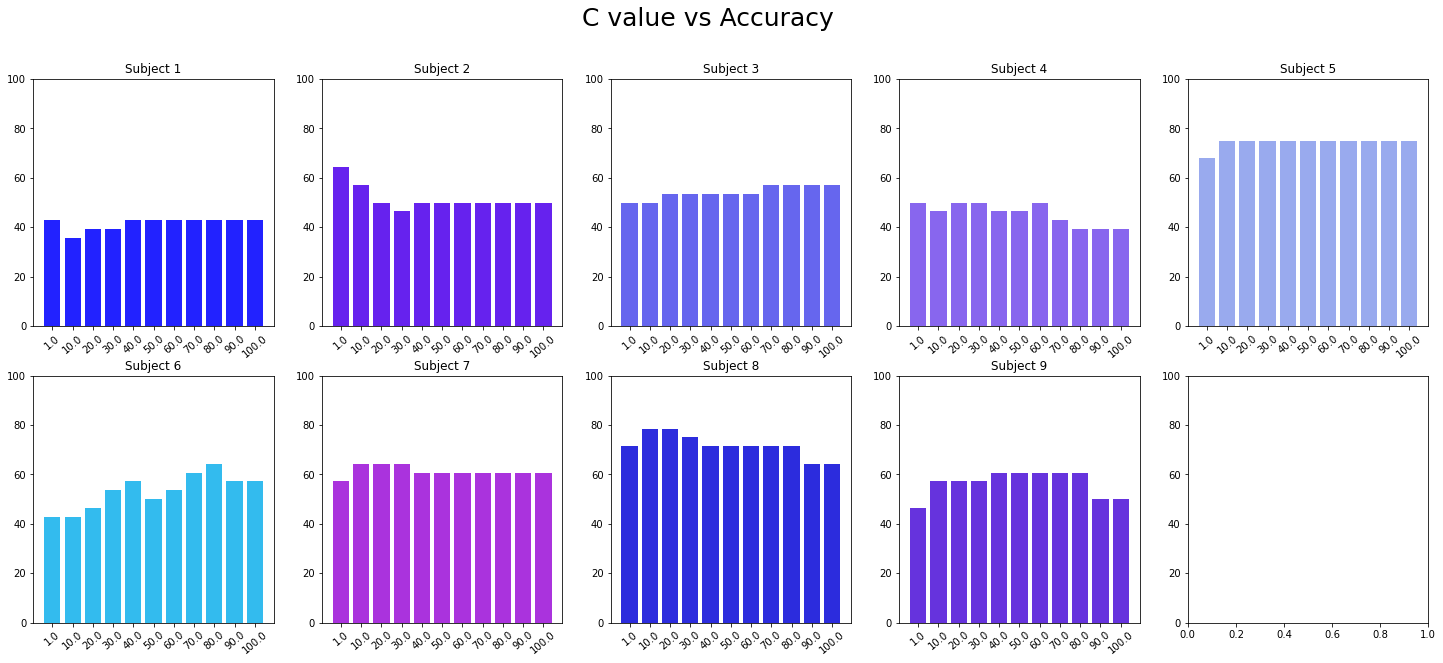

In [216]:
fig, ax = plt.subplots(2, 5, figsize=(25, 10))
fig.figsize=(20, 10)
fig.suptitle('C value vs Accuracy', fontsize=25)
ax[0, 0].bar(idx, res01[:, 1], color='#2222ff')
ax[0, 0].set_title('Subject 1')
ax[0, 0].set_xticks(idx)
ax[0, 0].set_xticklabels(Cval, rotation=40)

ax[0, 1].bar(idx, res02[:, 1], color='#6622ee')
ax[0, 1].set_title('Subject 2')
ax[0, 1].set_xticks(idx)
ax[0, 1].set_xticklabels(Cval, rotation=40)

ax[0, 2].bar(idx, res03[:, 1], color='#6666ee')
ax[0, 2].set_title('Subject 3')
ax[0, 2].set_xticks(idx)
ax[0, 2].set_xticklabels(Cval, rotation=40)

ax[0, 3].bar(idx, res04[:, 1], color='#8866ee')
ax[0, 3].set_title('Subject 4')
ax[0, 3].set_xticks(idx)
ax[0, 3].set_xticklabels(Cval, rotation=40)

ax[0, 4].bar(idx, res05[:, 1], color='#99aaee')
ax[0, 4].set_title('Subject 5')
ax[0, 4].set_xticks(idx)
ax[0, 4].set_xticklabels(Cval, rotation=40)

ax[1, 0].bar(idx, res06[:, 1], color='#33bbee')
ax[1, 0].set_title('Subject 6')
ax[1, 0].set_xticks(idx)
ax[1, 0].set_xticklabels(Cval, rotation=40)

ax[1, 1].bar(idx, res07[:, 1], color='#aa33dd')
ax[1, 1].set_title('Subject 7')
ax[1, 1].set_xticks(idx)
ax[1, 1].set_xticklabels(Cval, rotation=40)

ax[1, 2].bar(idx, res08[:, 1], color='#2c2cdd')
ax[1, 2].set_title('Subject 8')
ax[1, 2].set_xticks(idx)
ax[1, 2].set_xticklabels(Cval, rotation=40)

ax[1, 3].bar(idx, res09[:, 1], color='#6633dd')
ax[1, 3].set_title('Subject 9')
ax[1, 3].set_xticks(idx)
ax[1, 3].set_xticklabels(Cval, rotation=40)

for i in range(np.size(ax, 1)):
    ax[0, i].set_ylim(0, 100)
#     ax[0, i].bar(idx, globals()['res0'+str(i+1)][:, 1])
    
    ax[1, i].set_ylim(0, 100)
#     ax[1, i].bar(idx, globals()['res0'+str(i+6)][:, 1])
    
plt.savefig('normal-C-acc.png')
plt.show()

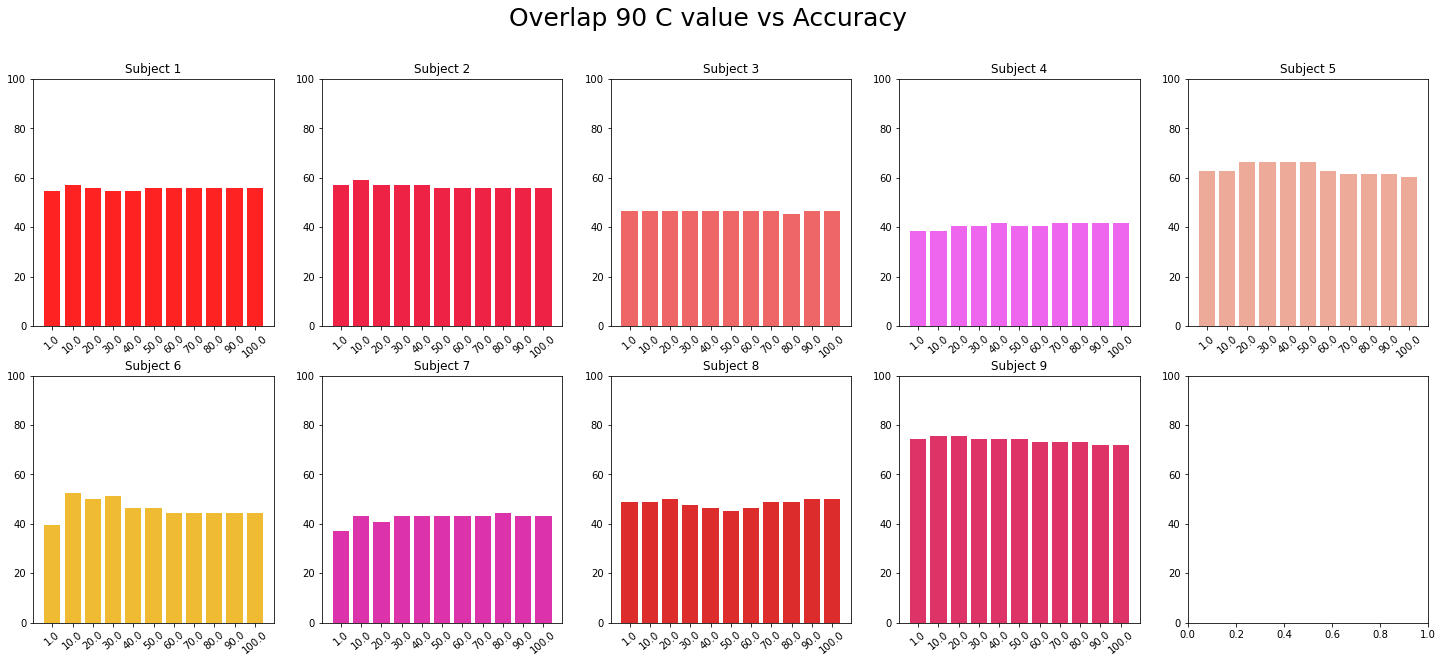

In [236]:
fig2, ax = plt.subplots(2, 5, figsize=(25, 10))
fig2.figsize=(20, 10)
fig2.suptitle('Overlap 90 C value vs Accuracy', fontsize=25)
ax[0, 0].bar(idx, res01_ol90[:, 1], color='#ff2222')
ax[0, 0].set_title('Subject 1')
ax[0, 0].set_xticks(idx)
ax[0, 0].set_xticklabels(Cval, rotation=40)

ax[0, 1].bar(idx, res02_ol90[:, 1], color='#ee2244')
ax[0, 1].set_title('Subject 2')
ax[0, 1].set_xticks(idx)
ax[0, 1].set_xticklabels(Cval, rotation=40)

ax[0, 2].bar(idx, res03_ol90[:, 1], color='#ee6666')
ax[0, 2].set_title('Subject 3')
ax[0, 2].set_xticks(idx)
ax[0, 2].set_xticklabels(Cval, rotation=40)

ax[0, 3].bar(idx, res04_ol90[:, 1], color='#ee66ee')
ax[0, 3].set_title('Subject 4')
ax[0, 3].set_xticks(idx)
ax[0, 3].set_xticklabels(Cval, rotation=40)

ax[0, 4].bar(idx, res05_ol90[:, 1], color='#eeaa99')
ax[0, 4].set_title('Subject 5')
ax[0, 4].set_xticks(idx)
ax[0, 4].set_xticklabels(Cval, rotation=40)

ax[1, 0].bar(idx, res06_ol90[:, 1], color='#eebb33')
ax[1, 0].set_title('Subject 6')
ax[1, 0].set_xticks(idx)
ax[1, 0].set_xticklabels(Cval, rotation=40)

ax[1, 1].bar(idx, res07_ol90[:, 1], color='#dd33aa')
ax[1, 1].set_title('Subject 7')
ax[1, 1].set_xticks(idx)
ax[1, 1].set_xticklabels(Cval, rotation=40)

ax[1, 2].bar(idx, res08_ol90[:, 1], color='#dd2c2c')
ax[1, 2].set_title('Subject 8')
ax[1, 2].set_xticks(idx)
ax[1, 2].set_xticklabels(Cval, rotation=40)

ax[1, 3].bar(idx, res09_ol90[:, 1], color='#dd3366')
ax[1, 3].set_title('Subject 9')
ax[1, 3].set_xticks(idx)
ax[1, 3].set_xticklabels(Cval, rotation=40)

for i in range(np.size(ax, 1)):
    ax[0, i].set_ylim(0, 100)
#     ax[0, i].bar(idx, globals()['res0'+str(i+1)][:, 1])
    
    ax[1, i].set_ylim(0, 100)
#     ax[1, i].bar(idx, globals()['res0'+str(i+6)][:, 1])
    
plt.savefig('overlap90-C-acc.png')
plt.show()

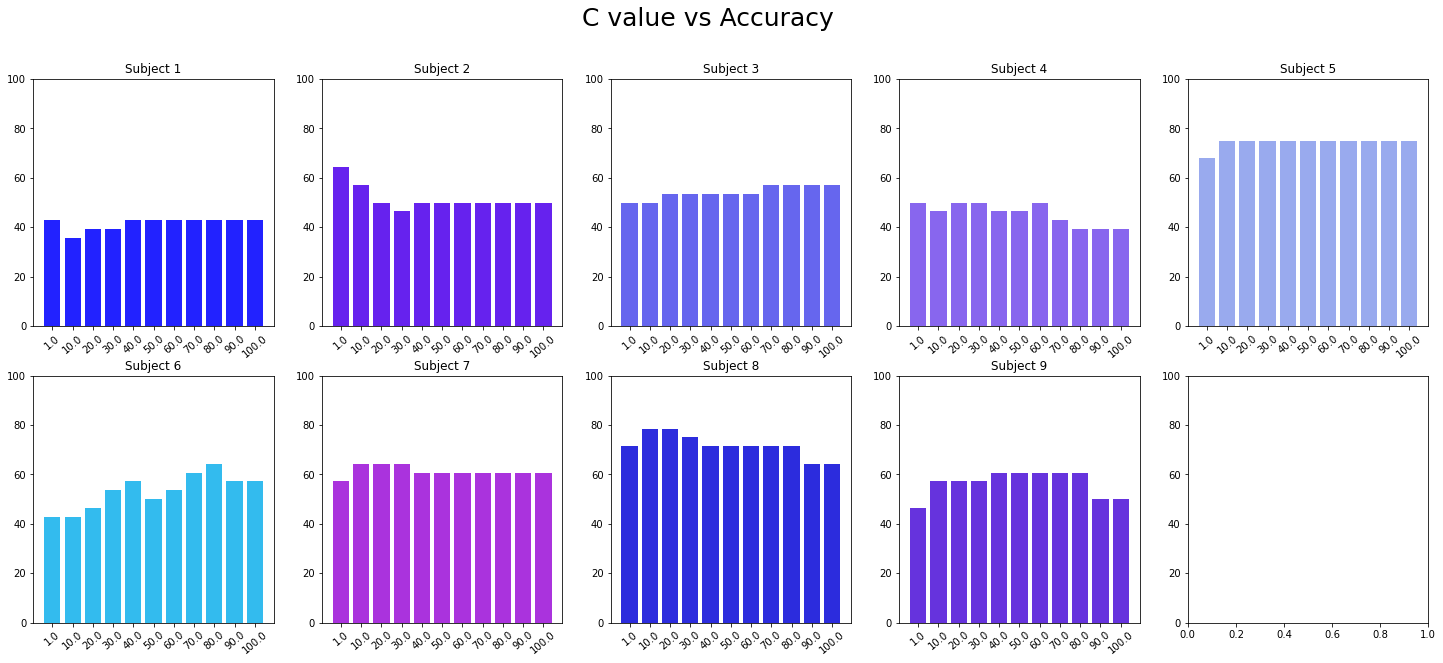

In [237]:
fig

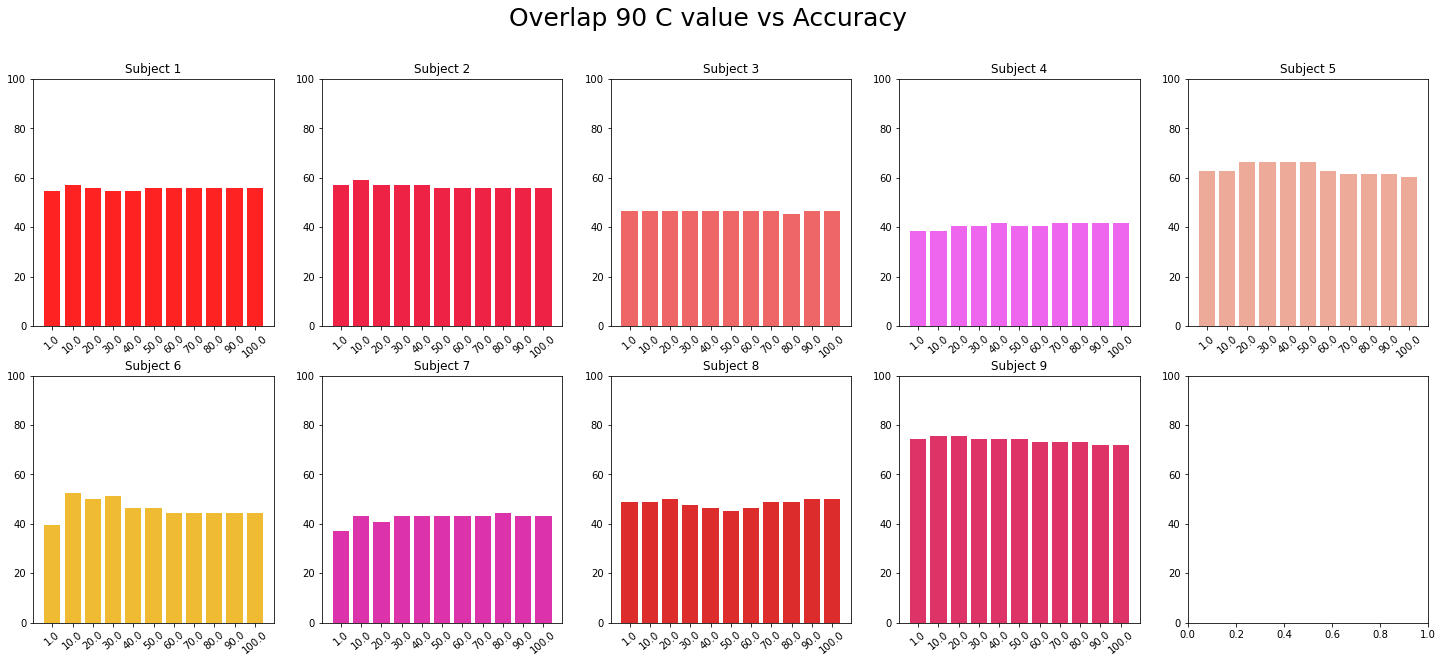

In [238]:
fig2

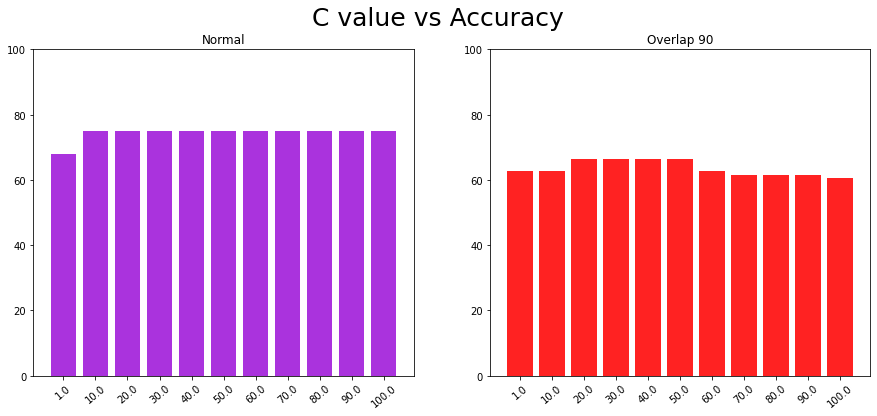

In [259]:

fig3, ax = plt.subplots(1, 2, figsize=(15, 6))
fig3.suptitle('C value vs Accuracy', fontsize=25)

ax[0].bar(idx, res05[:, 1], color='#aa33dd')
ax[0].set_title('Normal')
ax[0].set_xticks(idx)
ax[0].set_xticklabels(Cval, rotation=40)
ax[0].set_ylim(0, 100)

ax[1].bar(idx, res05_ol90[:, 1], color='#ff2222')
ax[1].set_title('Overlap 90')
ax[1].set_xticks(idx)
ax[1].set_xticklabels(Cval, rotation=40)
ax[1].set_ylim(0, 100)


plt.show()

In [240]:
# plt.figure(figsize=(10, 6))
# plt.bar(idx, res01[:, 1], color='#aa33dd')
# plt.suptitle('Normal C vs Acc', fontsize=20)
# plt.title('Subject 1')
# plt.xticks(idx, Cval, rotation=40)
# plt.ylim(0, 100)
# plt.show()

In [241]:
# plt.figure(figsize=(10, 6))
# plt.bar(idx, res01_ol90[:, 1], color='#ee2244')
# plt.suptitle('Overlap 90 C vs Acc', fontsize=20)
# plt.title('Subject 1')
# plt.xticks(idx, Cval, rotation=40)
# plt.ylim(0, 100)
# plt.show()

In [ ]:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

In [ ]:
fig, ax= plt.subplots(2, 2)
fig.suptitle('2x2 plot');
ax[0, 0].bar(idx, acc, align='center', alpha=0.5)
ax[0, 1].set_title('This is first plot')
ax[0, 1].plot(x, y, 'tab:orange')
ax[0, 1].set_title('Second plot')
ax[1, 0].plot(x, -y, 'tab:blue')
ax[1, 0].set_title('Third plot')
ax[1, 1].bar(idx, acc)
# ax[1, 1].set_xticks(idx, Cval)
ax[1, 1].set_xlabel('Cval')


In [ ]:
# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

In [ ]:
type(fig)

In [ ]:
ax.size

In [ ]:
tes = np.random.randint(1, 5, 10).reshape(5, 2)

In [ ]:
np.size(tes, axis=0)

In [ ]:
tes.size

In [ ]:
tes.size

In [ ]:
number

In [ ]:
type(number)

In [ ]:
for i in range(1, 10):
    new_var = 'Cov0' + str(i)
#     print(new_var)
    globals()[new_var] = 'This is inside new variable ' + str(i)
    

In [ ]:
Cov03

In [ ]:
type(Cov03)

### Confusion matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
cm = np.array(confusion_matrix(ytest, ypred, labels=[1, 0]))

In [ ]:
confusion = dframe(cm, index=['left hand', 'right hand'],
                columns=['predicted_left', 'predicted_right'])

In [ ]:
confusion

In [ ]:
sns.heatmap(confusion, annot=True)

In [ ]:
print(classification_report(ytest, ypred))